# Correção das Contas
*Por Lucas Pereira de Souza*

Criei este código para corrigir de maneira automatizada as contas dos cadernos dos alunos do Laboratório de Física Experimental 1.

Primeiramente, vamos definir módulos com as funções de fórmulas importantes:
1.   Erro absoluto:
\begin{equation}
ɛ_{\text{abs}} := x_{\text{med}} - x_{\text{verd}},
\end{equation}
2.   Erro relativo:
\begin{equation}
ɛ_{\text{rel}} := \frac{ɛ_{\text{abs}}}{x_{\text{verd}}},
\end{equation}
3.  Valor médio:
\begin{equation}
\left<x\right> := \frac{1}{n} \sum_{i=1}^{n} x_i,
\end{equation}
4.  Desvio médio:
\begin{equation}
d_m := \frac{1}{n} \sum_{i=1}^{n} \left|x_i - \left<x\right> \right|,
\end{equation}
5.  Variância:
\begin{equation}
\sigma^2 := \frac{1}{n} \sum_{i=1}^{n} \left(x_i - \left<x\right> \right)^2, = \left<x^2\right> - \left<x\right>^2,
\end{equation}
6.  Variância da população:
\begin{equation}
S^2 := \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \left<x\right> \right)^2, = \frac{n}{n-1} \left(\left<x^2\right> - \left<x\right>^2\right) = \frac{n \sigma^2}{n-1},
\end{equation}
7.  Desvio padrão:
\begin{equation}
\sigma := \sqrt{\sigma^2},
\end{equation}
8.  Desvio padrão da amostra:
\begin{equation}
S := \sqrt{S^2},
\end{equation}
9.  Desvio padrão da média:
\begin{equation}
\sigma_m := \frac{S}{\sqrt{n}} = \frac{\sigma}{\sqrt{n-1}},
\end{equation}
10. Incerteza combinada:
seja $f = f(x_i)$ uma função de $x_i$ variáveis, $u (x_i)$ o desvio padrão (da média ou amostra) da medida e $u_{ap}(x_i)$ o erro intrínseco do aparelho utilizado na medidada da variável $x_i$, então
\begin{equation}
u(f) := \sqrt{\sum_{i=1}^N \left(\frac{\partial f}{\partial x_i}\right)^2 (\delta x_i)^2} = \sqrt{\sum_{i=1}^N \left(\frac{\partial f}{\partial x_i}\right)^2 \left[u^2(x_i) + u^2_{ap} (x_i) \right]},
\end{equation}
11. Método do gráfico:
mede-se as variáveis $y$ e $x$, com $y(x) = a x + b$, encontram-se $a_{\text{max}}$, $a_{\text{min}}$, $b_{\text{max}}$ e $b_{\text{min}}$ com base nos $\left<x\right>$ e $\left<y\right>$, para obter
\begin{align}
a := \frac{\left(a_{\text{max}} + a_{\text{min}}\right)}{2} & \ & b := \frac{\left(b_{\text{max}} + b_{\text{min}}\right)}{2}, \\
u(a) := \frac{\left(a_{\text{max}} - a_{\text{min}}\right)}{2 \sqrt{n}} & \ & u(b) := \frac{\left(b_{\text{max}} - b_{\text{min}}\right)}{2 \sqrt{n}},
\end{align}
12. Método dos mínimos quadrados:
Calculam-se os coeficientes minimizando o desvio quadrático médio.
\begin{align}
a & = \frac{\left<x y \right> - \left<x\right>\left<y\right>}{\sigma^2_{x}}, \\
b & = \frac{\left<x^2\right> \left<y\right> - \left<x y\right>\left<x\right>}{\sigma^2_{x}},
\end{align}
com
\begin{equation}
r := a \sqrt{\frac{\sigma^2_x}{\sigma^2_y}}
\end{equation}
e a variância dos erros
\begin{equation}
S^2_{\varepsilon} := \sigma^2_x \left(\frac{1 - r^2}{1 - \frac{2}{n}}\right),
\end{equation}
o que nos leva ao erro nos coeficientes:
\begin{align}
u(a) := \sqrt{\frac{S^2_{\varepsilon}}{n \sigma^2_{x}}} = \sqrt{\frac{1 - r^2}{n - 2}} & \  & \text{ e } & \ & u(b) := u(a) \sqrt{\left<x^2\right>}.
\end{align}



In [ ]:
# Vamos importar os módulos básicos
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy as sp
sns.set_theme(style="darkgrid")

# Agora vamos definir as funções:

def err_abs(x_med, x_verd): # Erro absoluto
  return x_med - x_verd

def err_rel(x_med, x_verd): # Erro relativo
  return err_abs(x_med, x_verd)/x_verd

def med(x): # Valor médio
  return np.sum(x)/float(len(x))

def desv_med(x): # Desvio médio
  arg = [np.abs(k - med(x)) for k in x]
  return np.sum(arg)/float(len(x))

def variancia(x): # Variância
  arg = [(k - med(x))**2 for k in x]
  return np.sum(arg)/float(len(x))

def variancia_pop(x): # Variância da população
  arg = [(k - med(x))**2 for k in x]
  return np.sum(arg)/(float(len(x))-1.0)

def desv_padrao(x): # Desvio padrão
  return np.sqrt(variancia(x))

def desv_padrao_amostra(x): # Desvio padrão da amostra
  return np.sqrt(variancia_pop(x))

def desv_padrao_med(x): # Desvio padrão da média
  return desv_padrao(x)/np.sqrt(len(x)-1.0)

def incert_comb(x,uap): # Incerteza combinada simples
  return np.sqrt(desv_padrao_med(x)**2 + uap**2)

def incert_combgeral(f,sx, x,uap): # Incerteza combinada considerado uma função mais geral do sympy
  if len(uap) == 1:
    uap2 = uap**len(sx)
  else:
    uap2 = uap
  arg = 0
  xmed = [med(x[i]) for i in range(len(sx))]

  for i in range(len(sx)):
    df = f.diff(sx[i])
    uc = desv_padrao_med(x[i])**2 + uap2[i]**2
    dfval = df.subs(*zip(sx, xmed))
    arg = arg + (dfval**2)*(desv_padrao_med(x[i])**2 + uap2[i]**2)
  return np.sqrt(arg)

def metodo_grafico(amax,amin,bmax,bmin,x):
  a = (amax+amin)/2.0
  b = (bmax+bmin)/2.0
  ua = (amax-amin)/(2.0*np.sqrt(len(x)))
  ub = (bmax-bmin)/(2.0*np.sqrt(len(x)))
  return a,ua,b,ub

def MMQ(x,y):
  x2 = [k**2 for k in x]
  xy = [x[i]*y[i] for i in range(len(x))]
  a = (med(xy) - med(x)*med(y))/variancia(x)
  b = (med(x2)*med(y) - med(x)*med(xy))/variancia(x)
  r = a*np.sqrt(variancia(x)/variancia(y))
  ua = np.sqrt(1-r**2)/np.sqrt(len(x)-2.0)
  ub = ua*np.sqrt(med(x2))
  return a,ua,b,ub,r

# Experimento 4

## Bancada 3: Caderno da Ana

E agora, vamos pras correções. A começar pelos dados do caderno da Ana, da bancada 3.

In [ ]:
# medidas do tempo
t = [[0.21230,0.22245,0.21730],[0.41150,0.39430,0.36110],[0.53290,0.54595,0.50730],[0.8103,0.6737,0.69130],[0.89395,0.93345,0.8999],[1.0966,1.07745,0.98355],[1.42945,1.34045,1.214],[1.6339,1.4501,1.79695], [1.86385,1.81985,1.9153],[2.06915,2.04435,2.0843],[2.2462,2.31015,2.3699]]
t2 = [[1.49605,1.56695,1.5804],[2.67505,2.7099,2.48705]] # dados da tabela 2
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
x2 = [0.57, 0.95] # dados da tabela 2
ux = 0.00005
tmedlist = []
t2medlist = []
utlist = []
ut2list = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.21735 $\pm$ 0.00293
<t> = 0.38897 $\pm$ 0.01479
<t> = 0.52872 $\pm$ 0.01135
<t> = 0.72510 $\pm$ 0.04290
<t> = 0.90910 $\pm$ 0.01230
<t> = 1.05253 $\pm$ 0.03493
<t> = 1.32797 $\pm$ 0.06251
<t> = 1.62698 $\pm$ 0.10019
<t> = 1.86633 $\pm$ 0.02758
<t> = 2.06593 $\pm$ 0.01164
<t> = 2.30875 $\pm$ 0.03572
(<<t>>, <x>) = (1.18343 $\pm$ 0.21373, 0.60000 $\pm$ 0.05000)
a = 0.23285 $\pm$ 0.03216, b = 0.32444 $\pm$ 0.04383, r = 0.99534


## Bancada 5: Caderno do Jean (entregou atrasado!)

In [ ]:
# medidas do tempo
t = [
    [0.26270, 0.23415, 0.24515],
    [0.52400, 0.39675, 0.43605],
    [0.68235, 0.87240, 0.77330],
    [0.69215, 0.89620, 0.67410],
    [0.84760, 0.95975, 0.85315],
    [1.09155, 0.93790, 0.93355],
    [1.12460, 1.54500, 1.20800],
    [1.48630, 1.37110, 1.18930],
    [1.35900, 1.45360, 1.31920],
    [1.40395, 1.47955, 1.55700],
    [1.76110, 1.59230, 1.53235]]
# t2 = [[1.49605,1.56695,1.5804],[2.67505,2.7099,2.48705]] # dados da tabela 2
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
# x2 = [0.57, 0.95] # dados da tabela 2
ux = 0.00005
tmedlist = []
# t2medlist = []
utlist = []
# ut2list = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.24733 $\pm$ 0.00831
<t> = 0.45227 $\pm$ 0.03762
<t> = 0.77602 $\pm$ 0.05488
<t> = 0.75415 $\pm$ 0.07122
<t> = 0.88683 $\pm$ 0.03649
<t> = 0.98767 $\pm$ 0.05196
<t> = 1.29253 $\pm$ 0.12851
<t> = 1.34890 $\pm$ 0.08645
<t> = 1.37727 $\pm$ 0.03986
<t> = 1.48017 $\pm$ 0.04418
<t> = 1.62858 $\pm$ 0.06848
(<<t>>, <x>) = (1.02107 $\pm$ 0.13350, 0.60000 $\pm$ 0.05000)
a = 0.36768 $\pm$ 0.06345, b = 0.22458 $\pm$ 0.07010, r = 0.98172


## Bancada 6: Caderno do Davi

Agora o caderno do Davi, da bancada 6

In [ ]:
# medidas do tempo
t = [[0.22255,0.22260,0.23785],[0.3545,0.39165,0.3652],[0.50885,0.5194,0.5188],[0.7836,0.72585,0.6768],[0.99795,1.1344,0.82835],[0.97785,0.94295,0.94795],[1.1309,1.1093,1.19825],[1.29295,1.26395,1.2583], [1.47235,1.42895,1.4066],[1.6355,1.6528,1.58645],[1.7903,1.77355,1.76135]]
t2 = [[0.8771,0.86155,0.87255],[2.142,2.0687,2.0748]] # dados da tabela 2
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
x2 = [0.57, 0.95] # dados da tabela 2
ux = 0.00005
tmedlist = []
t2medlist = []
utlist = []
ut2list = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

for i in range(len(t2)):
  t2med = med(t2[i])
  t2medlist.append(tmed)
  ut2 = np.sqrt(desv_padrao_med(t2[i])**2 + uap**2)
  ut2list.append(ut)
  print(r'<t2> = %.5f $\pm$ %.5f'%(t2med,ut2))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.22767 $\pm$ 0.00509
<t> = 0.37045 $\pm$ 0.01104
<t> = 0.51568 $\pm$ 0.00342
<t> = 0.72875 $\pm$ 0.03086
<t> = 0.98690 $\pm$ 0.08852
<t> = 0.95625 $\pm$ 0.01090
<t> = 1.14615 $\pm$ 0.02679
<t> = 1.27173 $\pm$ 0.01073
<t> = 1.43597 $\pm$ 0.01930
<t> = 1.62492 $\pm$ 0.01987
<t> = 1.77507 $\pm$ 0.00839
<t2> = 0.87040 $\pm$ 0.00462
<t2> = 2.09517 $\pm$ 0.02348
(<<t>>, <x>) = (1.00359 $\pm$ 0.15313, 0.60000 $\pm$ 0.05000)
a = 0.32490 $\pm$ 0.03316, b = 0.27394 $\pm$ 0.03695, r = 0.99504


## Bancada 11: Caderno do Daniel

Agora do caderno do Daniel, da bancada 11:

In [ ]:
# medidas do tempo
t = [[0.2407,0.244,0.23665],[0.4221,0.3829,0.38725],[0.57345,0.55785,0.55125],[0.7767,0.70535,0.71515],[1.00555,0.88415,0.8553],[1.115,0.9985,0.5737],[1.24885,1.11875,1.12885],[1.4145,1.3891,1.28875], [1.6216,1.3925,1.4216],[1.6279,1.53235,1.7715],[1.92705,1.67975,1.7386]]
t2 = [[0.98215,0.8234,0.5068],[2.226,1.95225,2.02535]] # dados da tabela 2
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
x2 = [0.57, 0.95] # dados da tabela 2
ux = 0.00005
tmedlist = []
t2medlist = []
utlist = []
ut2list = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

for i in range(len(t2)):
  t2med = med(t2[i])
  t2medlist.append(tmed)
  ut2 = np.sqrt(desv_padrao_med(t2[i])**2 + uap**2)
  ut2list.append(ut)
  print(r'<t2> = %.5f $\pm$ %.5f'%(t2med,ut2))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.24045 $\pm$ 0.00213
<t> = 0.39742 $\pm$ 0.01241
<t> = 0.56085 $\pm$ 0.00658
<t> = 0.73240 $\pm$ 0.02233
<t> = 0.91500 $\pm$ 0.04603
<t> = 0.89573 $\pm$ 0.16449
<t> = 1.16548 $\pm$ 0.04179
<t> = 1.36412 $\pm$ 0.03839
<t> = 1.47857 $\pm$ 0.07201
<t> = 1.64392 $\pm$ 0.06950
<t> = 1.78180 $\pm$ 0.07459
<t2> = 0.77078 $\pm$ 0.13972
<t2> = 2.06787 $\pm$ 0.08183
(<<t>>, <x>) = (1.01598 $\pm$ 0.15476, 0.60000 $\pm$ 0.05000)
a = 0.32187 $\pm$ 0.02885, b = 0.27299 $\pm$ 0.03254, r = 0.99625


## Bancada 12: Caderno da Letícia

E aqui eu comecei a utilizar IA para extrair os dados das tabelas através de fotos, ao invés de ficar digitando um por um.

In [ ]:
# medidas do tempo
t = dados = [
    [0.22475, 0.22345, 0.22065],
    [0.36490, 0.36130, 0.36380],
    [0.48305, 0.48825, 0.48790],
    [0.59160, 0.61030, 0.61435],
    [0.71930, 0.77435, 0.74055],
    [0.90070, 0.90445, 0.91305],
    [1.03325, 1.03975, 1.05850],
    [1.17670, 1.16810, 1.16650],
    [1.19125, 1.29300, 1.31100],
    [1.36855, 1.46615, 1.47270],
    [1.50125, 1.56395, 1.59385]
]
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
ux = 0.00005
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.22295 $\pm$ 0.00121
<t> = 0.36333 $\pm$ 0.00107
<t> = 0.48640 $\pm$ 0.00168
<t> = 0.60542 $\pm$ 0.00701
<t> = 0.74473 $\pm$ 0.01603
<t> = 0.90607 $\pm$ 0.00366
<t> = 1.04383 $\pm$ 0.00757
<t> = 1.17043 $\pm$ 0.00317
<t> = 1.26508 $\pm$ 0.03728
<t> = 1.43580 $\pm$ 0.03368
<t> = 1.55302 $\pm$ 0.02728
(<<t>>, <x>) = (0.89064 $\pm$ 0.13376, 0.60000 $\pm$ 0.05000)
a = 0.37360 $\pm$ 0.01104, b = 0.26725 $\pm$ 0.01089, r = 0.99945


## Bancada 13: Caderno da Lauriely

In [ ]:
# medidas do tempo
t = dados = [
    [00.18575, 00.18650, 00.18565],
    [00.32460, 00.32705, 00.33240],
    [00.45850, 00.46190, 00.45875],
    [00.60270, 00.60600, 00.61635],
    [00.72965, 00.71905, 00.73180],
    [00.84310, 00.83060, 00.83490],
    [00.95765, 00.95510, 00.94455],
    [01.07670, 01.14180, 01.15505],
    [01.25875, 01.25335, 01.27805],
    [01.40085, 01.45465, 01.44885],
    [01.48805, 01.45410, 01.50715]
]
t2 = [[0.768,0.77525,0.7726],[1.71745,1.6855,1.77445]] # dados da tabela 2
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
x2 = [0.57, 0.95] # dados da tabela 2
ux = 0.00005
tmedlist = []
t2medlist = []
utlist = []
ut2list = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

for i in range(len(t2)):
  t2med = med(t2[i])
  t2medlist.append(tmed)
  ut2 = np.sqrt(desv_padrao_med(t2[i])**2 + uap**2)
  ut2list.append(ut)
  print(r'<t2> = %.5f $\pm$ %.5f'%(t2med,ut2))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.18597 $\pm$ 0.00027
<t> = 0.32802 $\pm$ 0.00230
<t> = 0.45972 $\pm$ 0.00110
<t> = 0.60835 $\pm$ 0.00411
<t> = 0.72683 $\pm$ 0.00394
<t> = 0.83620 $\pm$ 0.00367
<t> = 0.95243 $\pm$ 0.00401
<t> = 1.12452 $\pm$ 0.02421
<t> = 1.26338 $\pm$ 0.00750
<t> = 1.43478 $\pm$ 0.01705
<t> = 1.48310 $\pm$ 0.01551
<t2> = 0.77195 $\pm$ 0.00212
<t2> = 1.72580 $\pm$ 0.02601
(<<t>>, <x>) = (0.85485 $\pm$ 0.13276, 0.60000 $\pm$ 0.05000)
a = 0.37606 $\pm$ 0.01822, b = 0.27853 $\pm$ 0.01736, r = 0.99850


## Bancada 14: Caderno do Gabriel Maciel

In [ ]:
# medidas do tempo
t = dados = [
    [0.20625, 0.23175, 0.22585],
    [0.39935, 0.39835, 0.40280],
    [0.48595, 0.49650, 0.48940],
    [0.65960, 0.63335, 0.63580],
    [0.80900, 0.76290, 0.75105],
    [0.96250, 0.97735, 0.95040],
    [1.12955, 1.05185, 1.09710],
    [1.17275, 1.57540, 1.19850],
    [1.33300, 1.29385, 1.47235],
    [1.52875, 1.57820, 1.48890],
    [1.81775, 1.69550, 1.57505]
]
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
ux = 0.00005
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.22128 $\pm$ 0.00771
<t> = 0.40017 $\pm$ 0.00135
<t> = 0.49062 $\pm$ 0.00311
<t> = 0.64292 $\pm$ 0.00837
<t> = 0.77432 $\pm$ 0.01768
<t> = 0.96342 $\pm$ 0.00779
<t> = 1.09283 $\pm$ 0.02253
<t> = 1.31555 $\pm$ 0.13014
<t> = 1.36640 $\pm$ 0.05417
<t> = 1.53195 $\pm$ 0.02583
<t> = 1.69610 $\pm$ 0.07006
(<<t>>, <x>) = (0.95414 $\pm$ 0.14747, 0.60000 $\pm$ 0.05000)
a = 0.33843 $\pm$ 0.02012, b = 0.27709 $\pm$ 0.02137, r = 0.99818


## Bancada 15: Caderno do Renan

In [ ]:
# medidas do tempo
t = [
    [0.21695, 0.20395, 0.21405],
    [0.37005, 0.38250, 0.34085],
    [0.54240, 0.63880, 0.52540],
    [0.65575, 0.74775, 0.64865],
    [0.86720, 0.78430, 0.96585],
    [1.11730, 1.20115, 1.03550],
    [1.32315, 1.27940, 1.15185],
    [1.25080, 1.41865, 1.19900],
    [1.63560, 1.53440, 1.59625],
    [1.80470, 1.53290, 1.73160],
    [1.81760, 2.15330, 1.93945]
]
uap = 0.00005 #erro nessas medidas
# medidas da posição
x = [0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
ux = 0.00005
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t> = %.5f $\pm$ %.5f'%(tmed,ut))

tm = med(tmedlist)
utm = np.sqrt(desv_padrao_med(tmedlist)**2 + uap**2)
xm = med(x)
uxm = np.sqrt(desv_padrao_med(x)**2 + ux**2)
print(r'(<<t>>, <x>) = (%.5f $\pm$ %.5f, %.5f $\pm$ %.5f)'%(tm,utm,xm,uxm))

a,ua,b,ub,r = MMQ(tmedlist,x)
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))

<t> = 0.21165 $\pm$ 0.00394
<t> = 0.36447 $\pm$ 0.01234
<t> = 0.56887 $\pm$ 0.03531
<t> = 0.68405 $\pm$ 0.03192
<t> = 0.87245 $\pm$ 0.05247
<t> = 1.11798 $\pm$ 0.04782
<t> = 1.25147 $\pm$ 0.05138
<t> = 1.28948 $\pm$ 0.06629
<t> = 1.58875 $\pm$ 0.02945
<t> = 1.68973 $\pm$ 0.08121
<t> = 1.97012 $\pm$ 0.09811
(<<t>>, <x>) = (1.05537 $\pm$ 0.17104, 0.60000 $\pm$ 0.05000)
a = 0.29121 $\pm$ 0.02907, b = 0.29266 $\pm$ 0.03447, r = 0.99619


# Experimento 5

Para este experimento, todas as bancadas utilizarão valores de y entre 0,1 e 0,8 m, variando de 5 em 5 cm a cada medida. Além disso, foi ensinado em sala que além da média definida anteriormente, para o método dos gráficos, podemos fazer
\begin{equation}
  \left<\ln{y}\right> = \frac{\ln{y_{\max}} + \ln{y_{\min}}}{2} = \ln{\left({\sqrt{y_{\max} y_{\min}}}\right)},
\end{equation}
embora também seja possível calcular da forma definida anteriormente. Observe que, ao calcular os logarítmos da posição e tempo, temos que propagar o erro do aparelho:
\begin{equation}
  u(\ln{y}) = \frac{1}{y} u_y.
\end{equation}

Em particular, note que, se utilizarmos
\begin{equation}
  \left<\ln{y}\right> = \frac{1}{n} \sum_{i=1} ^n \ln{y_i},
\end{equation}
então
\begin{equation}
  u(\left<\ln{y}\right>) = \sqrt{\sigma^2_{\text{med}} (\ln{y}) + \frac{1}{n^2} \left(\sum_{i=1}^n u^2(\ln{y_i})\right)} = \sqrt{\sigma^2_{\text{med}} (\ln{y}) + \frac{1}{n} \left<u^2(\ln{y})\right>},
\end{equation}
ao passo que do jeito mostrado em aula, temos que
\begin{equation}
\bar{\sigma}_{\text{med}} (\ln{y}) = \frac{\ln{y_{\max}} - \ln{y_{\min}}}{2} = \ln{\left(\sqrt{\frac{y_{\max}}{y_{\min}}}\right)}
\end{equation}
e portanto
\begin{equation}
\bar{u}(\left<\ln{y}\right>) = \sqrt{\bar{\sigma}^2_{\text{med}} + \frac{1}{4} \left(u^2(\ln{y_{\max}}) + u^2(\ln{y_{\min}}) \right)}.
\end{equation}

Vamos definir estas novas funções, para facilitar a correção.

In [ ]:
def uln(y,uy): # Função que retorna o erro do logarítmo pra uma lista de valores
  if isinstance(uy, (float,np.float64,np.float32)):
    return [(1.0/x)*uy for x in y]
  else:
    return [(1.0/y[i])*uy[i] for i in range(len(y))]

def medlin(x): # Função que retorna a média linear
  return (x[0] + x[len(x)-1])/2.0

def umedlin(x): # Função que retorna o desvio linear da média
  return (x[0] - x[len(x)-1])/2.0

def ulin(x,ux): # Função que retorna o equivalente "linear" ao desvio padrão da média
  if isinstance(ux, (float,np.float64, np.float32)):
    return np.sqrt(umedlin(x)**2 + ux**2)
  else:
    return np.sqrt(umedlin(x)**2 + 0.25*(ux[0]**2 + ux[len(ux)-1]**2))

def umed(y,uy):
  u2 = np.array([x*x for x in uy])
  return np.sqrt(desv_padrao_med(y)**2 + (1.0/(float(len(y))))*(med(u2)))

y = np.array([0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]) # Medidas das posições
uy = 0.0005 # Erro da escala milimetrada da régua da posição
uap = 0.00005 # Erro nessas medidas de tempo
lny = np.log(y) # lista dos log dos y
ym = med(y) # Média dos y
yml = np.array([ym])
lnym = med(lny) # Média do ln(y)
lnymlin = medlin(lny) # Média linear dos ln(y)
ulnylin = ulin(lny,uln(y,uy)) # Erro total linear da média ensinada em sala
uym = np.sqrt(desv_padrao_med(y)**2 + uy**2) # Erro do y médio
ulny = uln(y,uy) # Erro nos ln(y)
ulnym = umed(lny, ulny) # Erro do ln(y) médio lembrando de propagar o erro da medida do y

print(r'Os valores de ln(y) serão:')
for i in range(len(y)):
  print(r'%.5f $\pm$ %.5f'%(lny[i],ulny[i]))
print(r'O y médio será: %.5f \pm %.5f m'%(ym,uym))
print(r'O ln(y) médio será: %.5f \pm %.5f ln(m)'%(lnym,ulnym))
print(r'O ln(y) médio linear será: %.5f \pm %.5f'%(lnymlin,ulnylin))
print(r'O ln(y_{médio}) será: %.5f \pm %.5f'%(np.log(ym),uln(yml,uym)[0]))
print(r'O erro relativo entre ln(y) médio e ln(y médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(ym) - lnym)/np.abs(lnym), np.abs(np.log(ym) - lnymlin)/np.abs(lnymlin)))
print(r'Enquanto o erro relativo entre ln(y) médio e ln(y) médio linear será %.5f'%(np.abs(lnym-lnymlin)/np.abs(lnym)))

Os valores de ln(y) serão:
-2.30259 $\pm$ 0.00500
-1.89712 $\pm$ 0.00333
-1.60944 $\pm$ 0.00250
-1.38629 $\pm$ 0.00200
-1.20397 $\pm$ 0.00167
-1.04982 $\pm$ 0.00143
-0.91629 $\pm$ 0.00125
-0.79851 $\pm$ 0.00111
-0.69315 $\pm$ 0.00100
-0.59784 $\pm$ 0.00091
-0.51083 $\pm$ 0.00083
-0.43078 $\pm$ 0.00077
-0.35667 $\pm$ 0.00071
-0.28768 $\pm$ 0.00067
-0.22314 $\pm$ 0.00063
O y médio será: 0.45000 \pm 0.05774 m
O ln(y) médio será: -0.95094 \pm 0.16068 ln(m)
O ln(y) médio linear será: -1.26286 \pm 1.03972
O ln(y_{médio}) será: -0.79851 \pm 0.12830
O erro relativo entre ln(y) médio e ln(y médio) será 0.16030 para a média usual e 0.36770 para a média linear
Enquanto o erro relativo entre ln(y) médio e ln(y) médio linear será 0.32801


## Bancada 3: Caderno da Ana

<t0> = 0.12897 $\pm$ 0.00068
<t1> = 0.16277 $\pm$ 0.00080
<t2> = 0.18662 $\pm$ 0.00199
<t3> = 0.21433 $\pm$ 0.00233
<t4> = 0.23353 $\pm$ 0.00044
<t5> = 0.25322 $\pm$ 0.00032
<t6> = 0.27182 $\pm$ 0.00046
<t7> = 0.28853 $\pm$ 0.00013
<t8> = 0.30487 $\pm$ 0.00008
<t9> = 0.32362 $\pm$ 0.00344
<t10> = 0.33520 $\pm$ 0.00023
<t11> = 0.34923 $\pm$ 0.00017
<t12> = 0.36538 $\pm$ 0.00214
<t13> = 0.37590 $\pm$ 0.00008
<t14> = 0.38783 $\pm$ 0.00028
Os valores de ln(t) serão:
-2.04820 $\pm$ 0.00527
-1.81544 $\pm$ 0.00489
-1.67870 $\pm$ 0.01065
-1.54022 $\pm$ 0.01089
-1.45443 $\pm$ 0.00187
-1.37351 $\pm$ 0.00128
-1.30263 $\pm$ 0.00168
-1.24294 $\pm$ 0.00044
-1.18788 $\pm$ 0.00026
-1.12820 $\pm$ 0.01064
-1.09303 $\pm$ 0.00069
-1.05202 $\pm$ 0.00049
-1.00681 $\pm$ 0.00585
-0.97843 $\pm$ 0.00020
-0.94718 $\pm$ 0.00073
O t médio será: 0.27879 \pm 0.02083 m
O ln(t) médio será: -1.32331 \pm 0.08484 ln(s)
O ln(t) médio linear será: -1.49769 \pm 0.55052
O ln(t_{médio}) será: -1.27730 \pm 0.07470
O erro relat

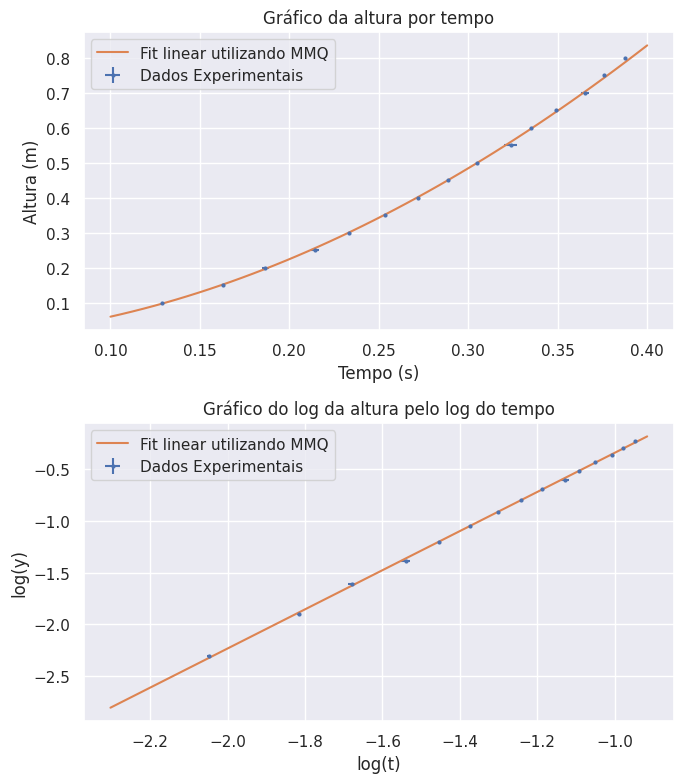

In [ ]:
t = np.array([
    [0.13015, 0.12780, 0.12895],
    [0.16210, 0.16435, 0.16185],
    [0.18275, 0.18775, 0.18935],
    [0.21210, 0.21190, 0.21900],
    [0.23280, 0.23430, 0.23350],
    [0.25380, 0.25270, 0.25315],
    [0.27155, 0.27120, 0.27270],
    [0.28875, 0.28835, 0.28850],
    [0.30490, 0.30495, 0.30475],
    [0.32005, 0.32030, 0.33050],
    [0.33545, 0.33475, 0.33540],
    [0.34915, 0.34900, 0.34955],
    [0.36310, 0.36965, 0.36340],
    [0.37590, 0.37600, 0.37580],
    [0.38835, 0.38775, 0.38740]
])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 5: Caderno do Jean

<t0> = 0.12042 $\pm$ 0.00147
<t1> = 0.15503 $\pm$ 0.00077
<t2> = 0.18068 $\pm$ 0.00088
<t3> = 0.20517 $\pm$ 0.00083
<t4> = 0.22665 $\pm$ 0.00065
<t5> = 0.24517 $\pm$ 0.00100
<t6> = 0.26477 $\pm$ 0.00035
<t7> = 0.27880 $\pm$ 0.00130
<t8> = 0.29772 $\pm$ 0.00190
<t9> = 0.31343 $\pm$ 0.00068
<t10> = 0.32918 $\pm$ 0.00027
<t11> = 0.34287 $\pm$ 0.00109
<t12> = 0.35392 $\pm$ 0.00102
<t13> = 0.36892 $\pm$ 0.00123
<t14> = 0.38450 $\pm$ 0.00167
Os valores de ln(t) serão:
-2.11680 $\pm$ 0.01218
-1.86412 $\pm$ 0.00495
-1.71101 $\pm$ 0.00484
-1.58393 $\pm$ 0.00402
-1.48435 $\pm$ 0.00288
-1.40582 $\pm$ 0.00409
-1.32891 $\pm$ 0.00131
-1.27726 $\pm$ 0.00465
-1.21161 $\pm$ 0.00639
-1.16017 $\pm$ 0.00217
-1.11114 $\pm$ 0.00083
-1.07041 $\pm$ 0.00317
-1.03869 $\pm$ 0.00289
-0.99718 $\pm$ 0.00335
-0.95581 $\pm$ 0.00433
O t médio será: 0.27115 \pm 0.02091 m
O ln(t) médio será: -1.35448 \pm 0.08814 ln(s)
O ln(t) médio linear será: -1.53630 \pm 0.58053
O ln(t_{médio}) será: -1.30509 \pm 0.07710
O erro relat

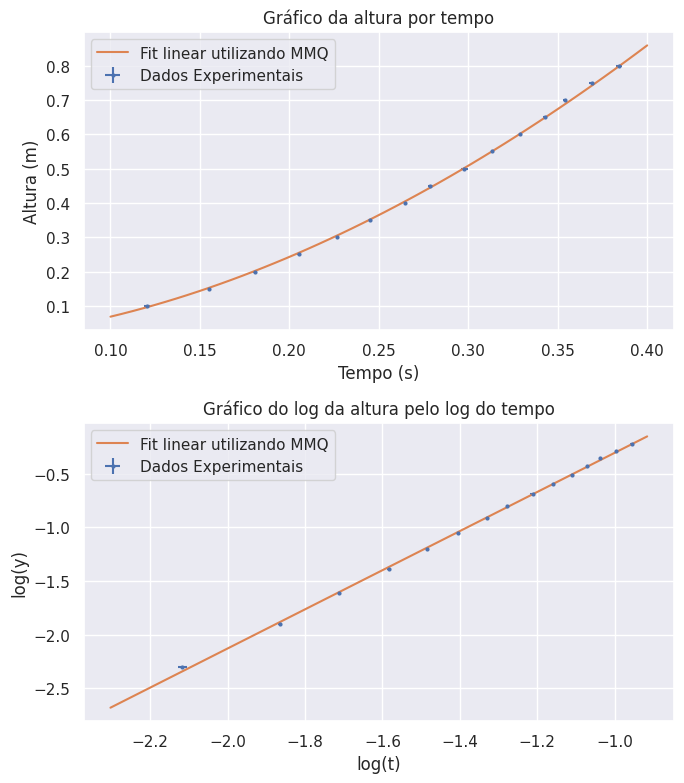

In [ ]:
t = np.array([
    [0.11805, 0.12010, 0.12310],
    [0.15375, 0.15495, 0.15640],
    [0.18045, 0.18230, 0.17930],
    [0.20625, 0.20355, 0.20570],
    [0.22725, 0.22735, 0.22535],
    [0.24495, 0.24700, 0.24355],
    [0.26495, 0.26525, 0.26410],
    [0.27635, 0.28075, 0.27930],
    [0.30120, 0.29730, 0.29465],
    [0.31475, 0.31250, 0.31305],
    [0.32940, 0.32865, 0.32950],
    [0.34070, 0.34385, 0.34405],
    [0.35275, 0.35305, 0.35595],
    [0.36735, 0.36805, 0.37135],
    [0.38125, 0.38675, 0.38550]])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 6: Caderno do Dylan

<t0> = 0.13462 $\pm$ 0.00015
<t1> = 0.16708 $\pm$ 0.00008
<t2> = 0.19408 $\pm$ 0.00019
<t3> = 0.21737 $\pm$ 0.00011
<t4> = 0.23937 $\pm$ 0.00013
<t5> = 0.25923 $\pm$ 0.00009
<t6> = 0.27732 $\pm$ 0.00007
<t7> = 0.29483 $\pm$ 0.00007
<t8> = 0.31093 $\pm$ 0.00025
<t9> = 0.32640 $\pm$ 0.00020
<t10> = 0.34165 $\pm$ 0.00018
<t11> = 0.35580 $\pm$ 0.00053
<t12> = 0.36922 $\pm$ 0.00024
<t13> = 0.38210 $\pm$ 0.00053
<t14> = 0.39600 $\pm$ 0.00014
Os valores de ln(t) serão:
-2.00532 $\pm$ 0.00108
-1.78926 $\pm$ 0.00047
-1.63947 $\pm$ 0.00099
-1.52617 $\pm$ 0.00048
-1.42976 $\pm$ 0.00053
-1.35003 $\pm$ 0.00034
-1.28260 $\pm$ 0.00024
-1.22135 $\pm$ 0.00023
-1.16818 $\pm$ 0.00081
-1.11963 $\pm$ 0.00060
-1.07397 $\pm$ 0.00053
-1.03339 $\pm$ 0.00149
-0.99637 $\pm$ 0.00065
-0.96207 $\pm$ 0.00139
-0.92634 $\pm$ 0.00034
O t médio será: 0.28440 \pm 0.02090 m
O ln(t) médio será: -1.30159 \pm 0.08301 ln(s)
O ln(t) médio linear será: -1.46583 \pm 0.53949
O ln(t_{médio}) será: -1.25737 \pm 0.07348
O erro relat

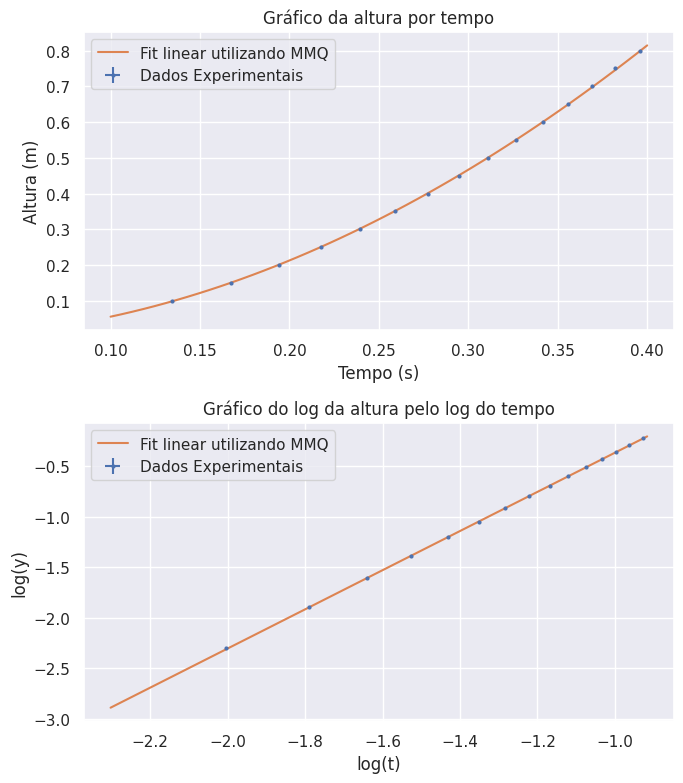

In [ ]:
t = np.array([
    [0.13470, 0.13435, 0.13480],
    [0.16700, 0.16720, 0.16705],
    [0.19385, 0.19395, 0.19445],
    [0.21755, 0.21730, 0.21725],
    [0.23940, 0.23955, 0.23915],
    [0.25935, 0.25925, 0.25910],
    [0.27725, 0.27730, 0.27740],
    [0.29490, 0.29475, 0.29485],
    [0.31045, 0.31110, 0.31125],
    [0.32605, 0.32645, 0.32670],
    [0.34165, 0.34135, 0.34195],
    [0.35660, 0.35600, 0.35480],
    [0.36915, 0.36965, 0.36885],
    [0.38315, 0.38170, 0.38145],
    [0.39590, 0.39585, 0.39625]])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 11: Caderno do Daniel

<t0> = 0.12446 $\pm$ 0.00006
<t1> = 0.15655 $\pm$ 0.00044
<t2> = 0.18135 $\pm$ 0.00023
<t3> = 0.20113 $\pm$ 0.00580
<t4> = 0.22012 $\pm$ 0.00782
<t5> = 0.24648 $\pm$ 0.01068
<t6> = 0.28467 $\pm$ 0.00951
<t7> = 0.28460 $\pm$ 0.01031
<t8> = 0.30773 $\pm$ 0.01397
<t9> = 0.33937 $\pm$ 0.02944
<t10> = 0.34312 $\pm$ 0.00965
<t11> = 0.35063 $\pm$ 0.00617
<t12> = 0.36333 $\pm$ 0.00433
<t13> = 0.37428 $\pm$ 0.00236
<t14> = 0.38567 $\pm$ 0.00225
Os valores de ln(t) serão:
-2.08380 $\pm$ 0.00049
-1.85438 $\pm$ 0.00281
-1.70733 $\pm$ 0.00127
-1.60379 $\pm$ 0.02885
-1.51360 $\pm$ 0.03553
-1.40046 $\pm$ 0.04334
-1.25642 $\pm$ 0.03342
-1.25667 $\pm$ 0.03621
-1.17852 $\pm$ 0.04541
-1.08067 $\pm$ 0.08676
-1.06968 $\pm$ 0.02811
-1.04801 $\pm$ 0.01759
-1.01243 $\pm$ 0.01193
-0.98274 $\pm$ 0.00632
-0.95278 $\pm$ 0.00583
O t médio será: 0.27757 \pm 0.02202 m
O ln(t) médio será: -1.33342 \pm 0.09056 ln(s)
O ln(t) médio linear será: -1.51829 \pm 0.56552
O ln(t_{médio}) será: -1.28170 \pm 0.07934
O erro relat

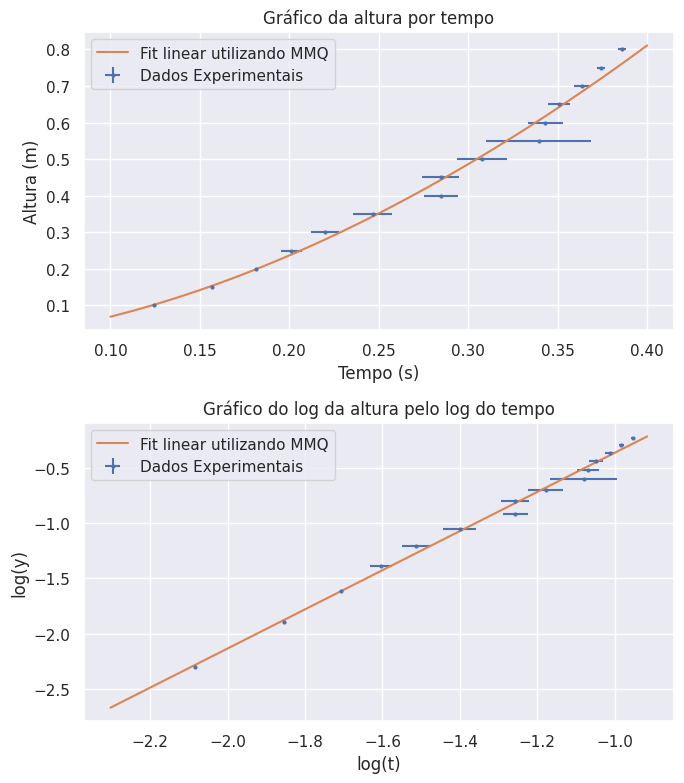

In [ ]:
t = np.array([
    [0.12445, 0.12440, 0.12452],
    [0.15680, 0.15715, 0.15570],
    [0.18090, 0.18160, 0.18155],
    [0.20630, 0.20755, 0.18955],
    [0.22715, 0.22870, 0.20450],
    [0.24625, 0.26510, 0.22810],
    [0.26633, 0.28945, 0.29823],
    [0.28460, 0.30245, 0.26675],
    [0.30315, 0.33390, 0.28615],
    [0.32005, 0.39720, 0.30085],
    [0.33400, 0.36240, 0.33295],
    [0.34340, 0.36290, 0.34560],
    [0.35885, 0.37200, 0.35915],
    [0.37220, 0.37900, 0.37165],
    [0.38215, 0.38500, 0.38985]
])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 12: Caderno do Edivaldo

<t0> = 0.12768 $\pm$ 0.00025
<t1> = 0.16145 $\pm$ 0.00100
<t2> = 0.18695 $\pm$ 0.00050
<t3> = 0.21033 $\pm$ 0.00283
<t4> = 0.23110 $\pm$ 0.00254
<t5> = 0.27163 $\pm$ 0.00341
<t6> = 0.28568 $\pm$ 0.00189
<t7> = 0.30248 $\pm$ 0.00252
<t8> = 0.31313 $\pm$ 0.00049
<t9> = 0.33302 $\pm$ 0.00321
<t10> = 0.34558 $\pm$ 0.00218
<t11> = 0.35180 $\pm$ 0.00070
<t12> = 0.35965 $\pm$ 0.00281
<t13> = 0.37730 $\pm$ 0.00367
<t14> = 0.38797 $\pm$ 0.00289
Os valores de ln(t) serão:
-2.05820 $\pm$ 0.00199
-1.82356 $\pm$ 0.00622
-1.67691 $\pm$ 0.00269
-1.55906 $\pm$ 0.01347
-1.46490 $\pm$ 0.01099
-1.30330 $\pm$ 0.01257
-1.25287 $\pm$ 0.00662
-1.19573 $\pm$ 0.00833
-1.16113 $\pm$ 0.00158
-1.09956 $\pm$ 0.00963
-1.06252 $\pm$ 0.00630
-1.04469 $\pm$ 0.00200
-1.02262 $\pm$ 0.00781
-0.97471 $\pm$ 0.00972
-0.94684 $\pm$ 0.00746
O t médio será: 0.28305 \pm 0.02122 m
O ln(t) médio será: -1.30977 \pm 0.08692 ln(s)
O ln(t) médio linear será: -1.50252 \pm 0.55570
O ln(t_{médio}) será: -1.26213 \pm 0.07496
O erro relat

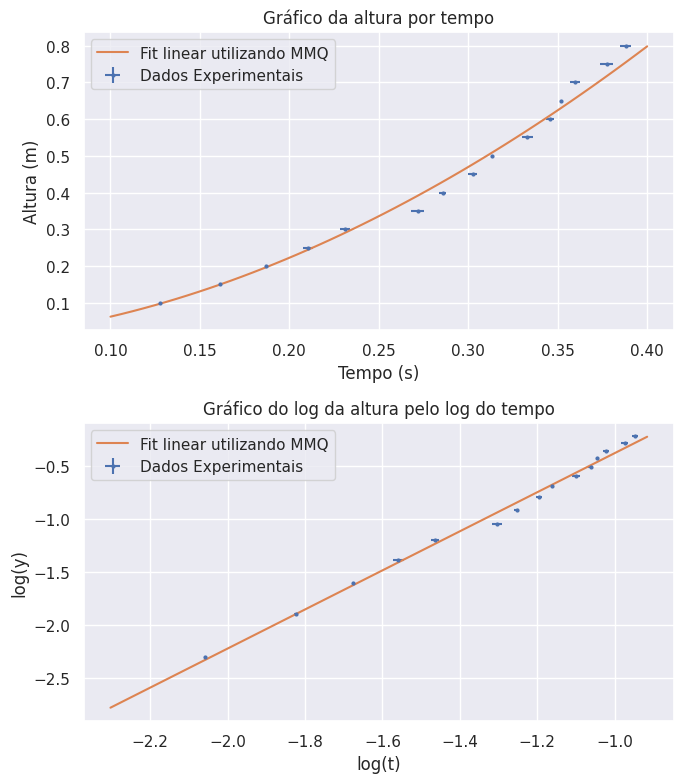

In [ ]:
t = np.array([
    [0.12815, 0.12760, 0.12730],
    [0.16170, 0.15960, 0.16305],
    [0.18740, 0.18750, 0.18595],
    [0.21135, 0.21465, 0.20500],
    [0.22765, 0.23605, 0.22960],
    [0.26855, 0.27845, 0.26790],
    [0.28205, 0.28840, 0.28660],
    [0.30135, 0.30730, 0.29880],
    [0.31360, 0.31215, 0.31365],
    [0.32755, 0.33865, 0.33285],
    [0.34810, 0.34125, 0.34740],
    [0.35115, 0.35105, 0.35320],
    [0.35590, 0.35790, 0.36515],
    [0.38270, 0.37890, 0.37030],
    [0.38865, 0.38265, 0.39260]])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 13: Caderno da Victória

<t0> = 0.12588 $\pm$ 0.00024
<t1> = 0.15942 $\pm$ 0.00011
<t2> = 0.18603 $\pm$ 0.00015
<t3> = 0.20868 $\pm$ 0.00042
<t4> = 0.23037 $\pm$ 0.00017
<t5> = 0.24958 $\pm$ 0.00023
<t6> = 0.26877 $\pm$ 0.00015
<t7> = 0.28520 $\pm$ 0.00034
<t8> = 0.30260 $\pm$ 0.00033
<t9> = 0.31728 $\pm$ 0.00013
<t10> = 0.33340 $\pm$ 0.00024
<t11> = 0.34708 $\pm$ 0.00017
<t12> = 0.36005 $\pm$ 0.00027
<t13> = 0.37437 $\pm$ 0.00029
<t14> = 0.38563 $\pm$ 0.00207
Os valores de ln(t) serão:
-2.07240 $\pm$ 0.00191
-1.83623 $\pm$ 0.00066
-1.68183 $\pm$ 0.00081
-1.56694 $\pm$ 0.00203
-1.46808 $\pm$ 0.00076
-1.38796 $\pm$ 0.00091
-1.31391 $\pm$ 0.00057
-1.25456 $\pm$ 0.00121
-1.19534 $\pm$ 0.00108
-1.14796 $\pm$ 0.00040
-1.09841 $\pm$ 0.00071
-1.05819 $\pm$ 0.00049
-1.02151 $\pm$ 0.00075
-0.98252 $\pm$ 0.00077
-0.95287 $\pm$ 0.00537
O t médio será: 0.27562 \pm 0.02084 m
O ln(t) médio será: -1.33592 \pm 0.08597 ln(s)
O ln(t) médio linear será: -1.51263 \pm 0.55977
O ln(t_{médio}) será: -1.28872 \pm 0.07561
O erro relat

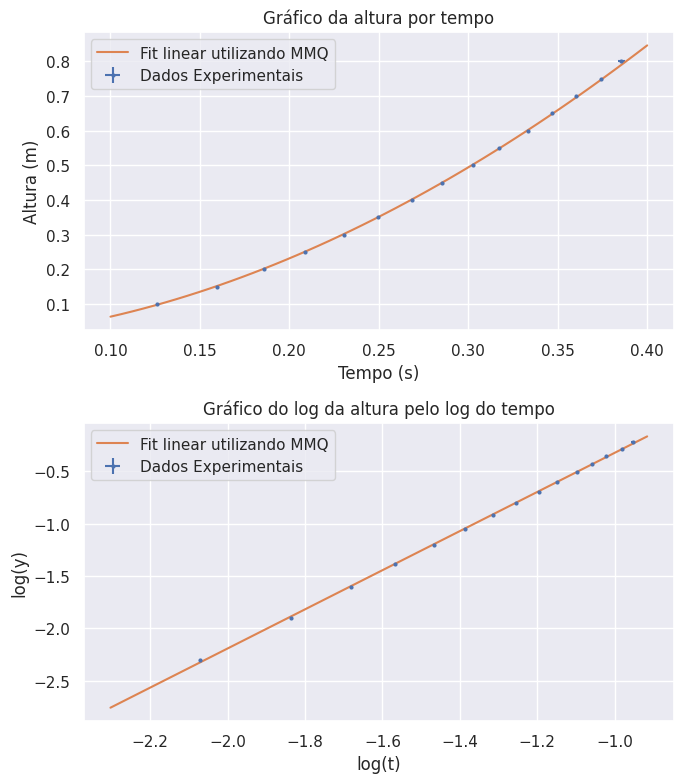

In [ ]:
t = np.array([
    [0.12560, 0.12570, 0.12635],
    [0.15935, 0.15930, 0.15960],
    [0.18620, 0.18615, 0.18575],
    [0.20900, 0.20920, 0.20785],
    [0.23070, 0.23020, 0.23020],
    [0.24925, 0.24950, 0.25000],
    [0.26850, 0.26880, 0.26900],
    [0.28470, 0.28505, 0.28585],
    [0.30320, 0.30250, 0.30210],
    [0.31725, 0.31750, 0.31710],
    [0.33340, 0.33380, 0.33300],
    [0.34740, 0.34685, 0.34700],
    [0.35965, 0.35995, 0.36055],
    [0.37380, 0.37465, 0.37465],
    [0.38785, 0.38755, 0.38150]])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 14 Caderno do Axel

<t0> = 0.12423 $\pm$ 0.00049
<t1> = 0.15555 $\pm$ 0.00007
<t2> = 0.18300 $\pm$ 0.00090
<t3> = 0.20685 $\pm$ 0.00088
<t4> = 0.22787 $\pm$ 0.00029
<t5> = 0.25722 $\pm$ 0.00057
<t6> = 0.26550 $\pm$ 0.00037
<t7> = 0.28318 $\pm$ 0.00044
<t8> = 0.29975 $\pm$ 0.00064
<t9> = 0.31530 $\pm$ 0.00036
<t10> = 0.32922 $\pm$ 0.00014
<t11> = 0.35045 $\pm$ 0.00349
<t12> = 0.34845 $\pm$ 0.00629
<t13> = 0.37140 $\pm$ 0.00033
<t14> = 0.37960 $\pm$ 0.00323
Os valores de ln(t) serão:
-2.08559 $\pm$ 0.00392
-1.86079 $\pm$ 0.00045
-1.69827 $\pm$ 0.00494
-1.57576 $\pm$ 0.00427
-1.47899 $\pm$ 0.00129
-1.35784 $\pm$ 0.00221
-1.32614 $\pm$ 0.00138
-1.26166 $\pm$ 0.00156
-1.20480 $\pm$ 0.00213
-1.15423 $\pm$ 0.00115
-1.11104 $\pm$ 0.00042
-1.04854 $\pm$ 0.00997
-1.05426 $\pm$ 0.01806
-0.99048 $\pm$ 0.00089
-0.96864 $\pm$ 0.00850
O t médio será: 0.27317 \pm 0.02062 m
O ln(t) médio será: -1.34513 \pm 0.08644 ln(s)
O ln(t) médio linear será: -1.52712 \pm 0.55850
O ln(t_{médio}) será: -1.29766 \pm 0.07549
O erro relat

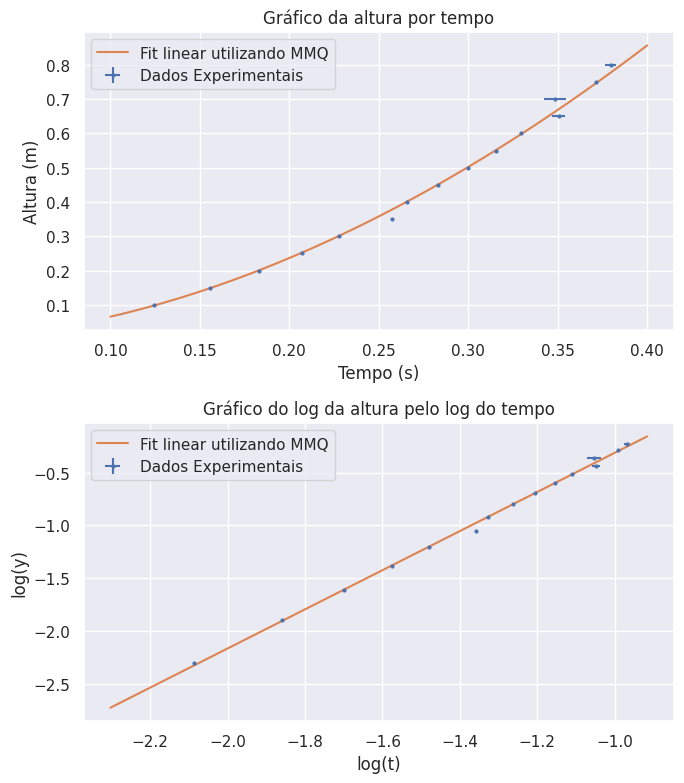

In [ ]:
t = np.array([
    [0.12520, 0.12380, 0.12370],
    [0.15560, 0.15545, 0.15560],
    [0.18200, 0.18220, 0.18480],
    [0.20690, 0.20835, 0.20530],
    [0.22835, 0.22790, 0.22735],
    [0.25835, 0.25665, 0.25665],
    [0.26615, 0.26490, 0.26545],
    [0.28305, 0.28400, 0.28250],
    [0.30100, 0.29936, 0.29890],
    [0.31480, 0.31600, 0.31510],
    [0.32920, 0.32900, 0.32945],
    [0.35330, 0.35455, 0.34350],
    [0.35785, 0.33650, 0.35100],
    [0.37115, 0.37100, 0.37205],
    [0.37315, 0.38280, 0.38285]
    ])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bancada 15: Caderno do Jonas

<t0> = 0.13545 $\pm$ 0.00019
<t1> = 0.16433 $\pm$ 0.00011
<t2> = 0.19130 $\pm$ 0.00007
<t3> = 0.21292 $\pm$ 0.00029
<t4> = 0.23520 $\pm$ 0.00028
<t5> = 0.25458 $\pm$ 0.00012
<t6> = 0.27228 $\pm$ 0.00063
<t7> = 0.28678 $\pm$ 0.00245
<t8> = 0.29745 $\pm$ 0.00054
<t9> = 0.31190 $\pm$ 0.00053
<t10> = 0.32718 $\pm$ 0.00077
<t11> = 0.34202 $\pm$ 0.00074
<t12> = 0.35492 $\pm$ 0.00091
<t13> = 0.36625 $\pm$ 0.00126
<t14> = 0.38040 $\pm$ 0.00071
Os valores de ln(t) serão:
-1.99915 $\pm$ 0.00138
-1.80586 $\pm$ 0.00064
-1.65391 $\pm$ 0.00037
-1.54685 $\pm$ 0.00138
-1.44732 $\pm$ 0.00119
-1.36813 $\pm$ 0.00047
-1.30091 $\pm$ 0.00230
-1.24903 $\pm$ 0.00854
-1.21251 $\pm$ 0.00181
-1.16507 $\pm$ 0.00170
-1.11723 $\pm$ 0.00235
-1.07290 $\pm$ 0.00215
-1.03587 $\pm$ 0.00257
-1.00444 $\pm$ 0.00343
-0.96653 $\pm$ 0.00187
O t médio será: 0.27553 \pm 0.01947 m
O ln(t) médio será: -1.32971 \pm 0.07946 ln(s)
O ln(t) médio linear será: -1.48284 \pm 0.51631
O ln(t_{médio}) será: -1.28905 \pm 0.07068
O erro relat

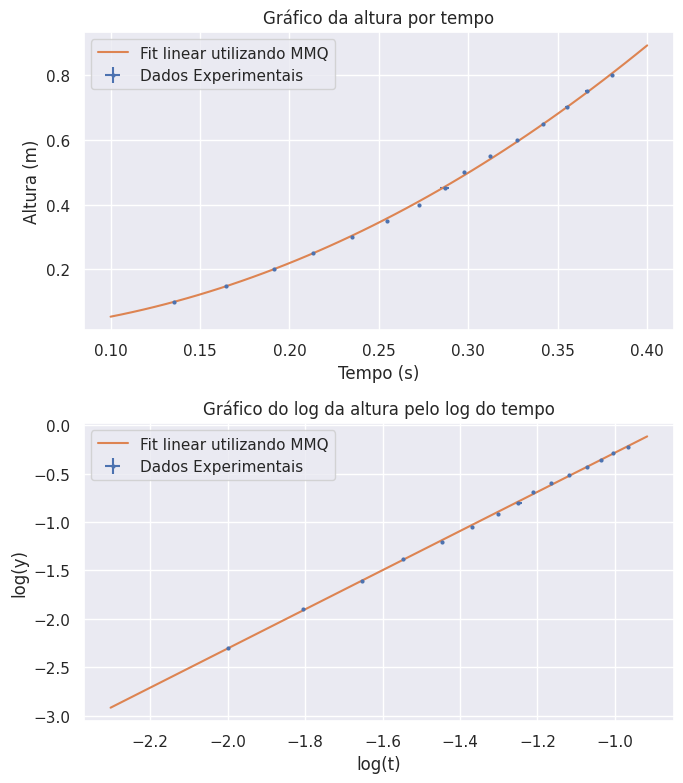

In [ ]:
t = np.array([
    [0.13580, 0.13520, 0.13535],
    [0.16415, 0.16440, 0.16445],
    [0.19125, 0.19125, 0.19140],
    [0.21330, 0.21310, 0.21235],
    [0.23495, 0.23490, 0.23575],
    [0.25445, 0.25450, 0.25480],
    [0.27115, 0.27240, 0.27330],
    [0.28955, 0.28890, 0.28190],
    [0.29655, 0.29840, 0.29740],
    [0.31130, 0.31145, 0.31295],
    [0.32565, 0.32795, 0.32795],
    [0.34275, 0.34055, 0.34275],
    [0.35575, 0.35590, 0.35310],
    [0.36620, 0.36410, 0.36845],
    [0.38130, 0.37900, 0.38090]])
tmedlist = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tm = med(tmedlist)
utm = umed(tmedlist, utlist)

lnt = np.log(tmedlist) # lista dos log dos t
tml = np.array([tm])
lntm = med(lnt) # Média do ln(t)
lntmlin = medlin(lnt) # Média linear dos ln(t)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t

print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lnt[i],ulnt[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))

a,ua,b,ub,r = MMQ(lnt,lny)
print("Para o método dos mínimos quadrados, temos que:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f'%(g,ug))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
expy = np.array([np.exp(l) for l in ylin])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 8))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
plt.tight_layout()
plt.show()

## Bônus: Nosso experimento

> Adicionar aspas



Os valores de ln(y) com o ponto extra serão:
-2.30259 $\pm$ 0.00500
-1.89712 $\pm$ 0.00333
-1.60944 $\pm$ 0.00250
-1.38629 $\pm$ 0.00200
-1.20397 $\pm$ 0.00167
-1.04982 $\pm$ 0.00143
-0.91629 $\pm$ 0.00125
-0.79851 $\pm$ 0.00111
-0.69315 $\pm$ 0.00100
-0.59784 $\pm$ 0.00091
-0.51083 $\pm$ 0.00083
-0.43078 $\pm$ 0.00077
-0.35667 $\pm$ 0.00071
-0.28768 $\pm$ 0.00067
-0.22314 $\pm$ 0.00063
-0.17435 $\pm$ 0.00060
O y médio será: 0.47437 \pm 0.05925 m
O ln(y) médio será: -0.90240 \pm 0.15795 ln(m)
O ln(y) médio linear será: -1.23847 \pm 1.06412
O ln(y_{médio}) será: -0.74576 \pm 0.12491
O erro relativo entre ln(y) médio e ln(y médio) será 0.17359 para a média usual e 0.39784 para a média linear
Enquanto o erro relativo entre ln(y) médio e ln(y) médio linear será 0.37241
<t0> = 0.11548 $\pm$ 0.00042
<t1> = 0.14753 $\pm$ 0.00012
<t2> = 0.17437 $\pm$ 0.00045
<t3> = 0.19798 $\pm$ 0.00061
<t4> = 0.21793 $\pm$ 0.00026
<t5> = 0.23857 $\pm$ 0.00027
<t6> = 0.25668 $\pm$ 0.00023
<t7> = 0.27350 $\pm$ 

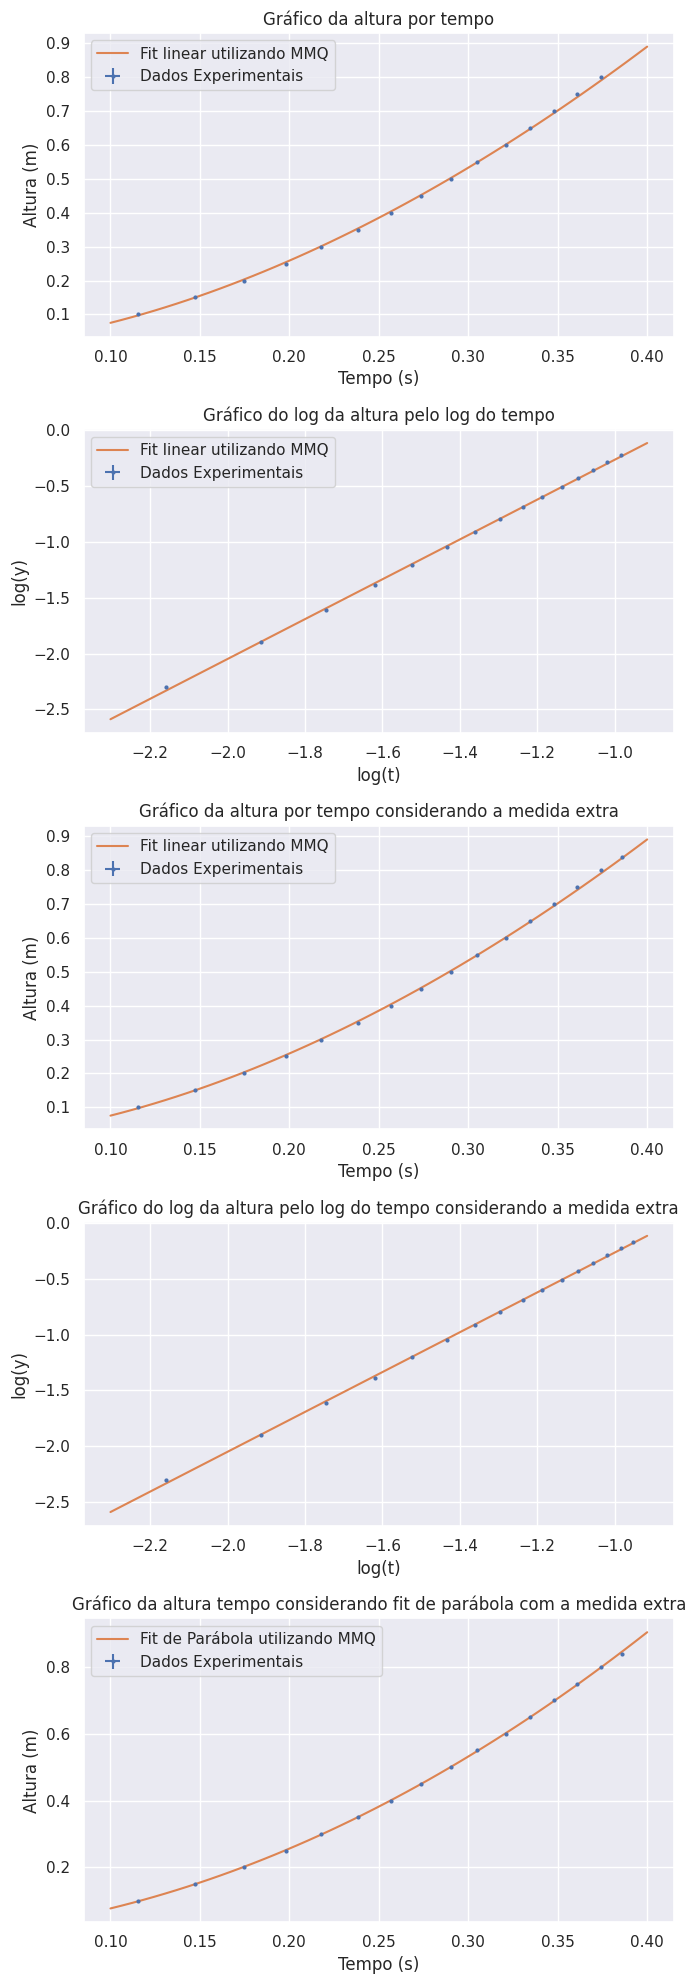

In [ ]:
t = np.array([
    [0.11480, 0.11540, 0.11625],
    [0.14775, 0.14740, 0.14745],
    [0.17520, 0.17365, 0.17425],
    [0.19690, 0.19900, 0.19805],
    [0.21830, 0.21805, 0.21745],
    [0.23895, 0.23870, 0.23805],
    [0.25660, 0.25635, 0.25710],
    [0.27420, 0.27335, 0.27295],
    [0.29015, 0.29005, 0.29065],
    [0.30350, 0.30540, 0.30625],
    [0.32130, 0.32015, 0.32115],
    [0.33435, 0.33515, 0.33470],
    [0.34805, 0.34735, 0.34850],
    [0.36070, 0.36110, 0.36080],
    [0.37435, 0.37390, 0.37410]
]) # Tempos que medimos
textra = np.append(t, [[0.38550, 0.38610, 0.38590]], axis=0) # Medida extra que fizemos
yextra = np.append(y, [0.84], axis=0) # Posição nessa medida extra

# Refazendo contas lá do início, porém considerando a medida extra
lnyextra = np.log(yextra) # lista dos log dos y
ymextra = med(yextra) # Média dos y
ymlextra = np.array([ymextra])
lnymextra = med(lnyextra) # Média do ln(y)
lnymlinextra = medlin(lnyextra) # Média linear dos ln(y)
ulnylinextra = ulin(lnyextra,uln(yextra,uy)) # Erro total linear da média ensinada em sala
uymextra = np.sqrt(desv_padrao_med(yextra)**2 + uy**2) # Erro do y médio
ulnyextra = uln(yextra,uy) # Erro nos ln(y)
ulnymextra = umed(lnyextra, ulnyextra) # Erro do ln(y) médio lembrando de propagar o erro da medida do y

print(r'Os valores de ln(y) com o ponto extra serão:')
for i in range(len(yextra)):
  print(r'%.5f $\pm$ %.5f'%(lnyextra[i],ulnyextra[i]))
print(r'O y médio será: %.5f \pm %.5f m'%(ymextra,uymextra))
print(r'O ln(y) médio será: %.5f \pm %.5f ln(m)'%(lnymextra,ulnymextra))
print(r'O ln(y) médio linear será: %.5f \pm %.5f'%(lnymlinextra,ulnylinextra))
print(r'O ln(y_{médio}) será: %.5f \pm %.5f'%(np.log(ymextra),uln(ymlextra,uymextra)[0]))
print(r'O erro relativo entre ln(y) médio e ln(y médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(ymextra) - lnymextra)/np.abs(lnymextra), np.abs(np.log(ymextra) - lnymlinextra)/np.abs(lnymlinextra)))
print(r'Enquanto o erro relativo entre ln(y) médio e ln(y) médio linear será %.5f'%(np.abs(lnymextra-lnymlinextra)/np.abs(lnymextra)))

tmedlist = []
tmedlistextra = []
utlist = []
for i in range(len(t)):
  tmed = med(t[i])
  tmedlist.append(tmed)
  ut = np.sqrt(desv_padrao_med(t[i])**2 + uap**2)
  utlist.append(ut)
  print(r'<t%i> = %.5f $\pm$ %.5f'%(i,tmed,ut))

tmedextra = med(textra[len(textra)-1])
ut = np.sqrt(desv_padrao_med(textra[len(textra)-1])**2 + uap**2)
tmedlist = np.array(tmedlist)
tmedlistextra = np.append(tmedlist, [tmedextra])
utlist = np.array(utlist)
utlistextra = np.append(utlist, [ut])
tm = med(tmedlist)
tmextra = med(tmedlistextra)
utm = umed(tmedlist, utlist)
utmextra = umed(tmedlistextra, utlistextra)

lnt = np.log(tmedlist) # lista dos log dos t
lntextra = np.log(tmedlistextra)
tml = np.array([tm])
tmlextra = np.array([tmextra])
lntm = med(lnt) # Média do ln(t)
lntmextra = med(lntextra) # Média do ln(t) com o tempo extra que a gente marcou
lntmlin = medlin(lnt) # Média linear dos ln(t)
lntmlinextra = medlin(lntextra)
ulntlin = ulin(lnt,uln(tmedlist,utlist)) # Erro total linear da média ensinada em sala
ulntlinextra = ulin(lntextra,uln(tmedlistextra,utlistextra))
ulnt = uln(tmedlist,utlist) # Erro nos ln(t)
ulntextra = uln(tmedlistextra,utlistextra)
ulntm = umed(lnt, ulnt) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
ulntmextra = umed(lntextra, ulntextra)

# Método de interpolação que o Nicolas fez:
# Construção da matriz X
X = np.column_stack((tmedlistextra**2, tmedlistextra, np.ones_like(tmedlistextra)))

# Cálculo dos coeficientes usando a equação dos mínimos quadrados
beta = np.linalg.inv(X.T @ X) @ X.T @ yextra

# Cálculo dos resíduos
residuos = yextra - X @ beta

# Estimativa da variância residual
N, p = X.shape
sigma2 = np.sum(residuos**2) / (N - p)

# Matriz de covariância dos coeficientes
C = sigma2 * np.linalg.inv(X.T @ X)

# Erros nos coeficientes (desvio padrão)
erro_a, erro_b, erro_c = np.sqrt(np.diag(C))

# Coeficientes da parábola
apar, bpar, cpar = beta

print(f'Considerando $v_0$ diferente de 0, a aceleração da gravidade será: g = {2.0*apar:.5f} ± {2.0*erro_a:.5f} m/s^2')

# Continuação dos cálculos considerando monômio
print(r'Os valores de ln(t) serão:')
for i in range(len(t)):
  print(r'%.5f $\pm$ %.5f'%(lntextra[i],ulntextra[i]))
print(r'O t médio será: %.5f \pm %.5f m'%(tm,utm))
print(r'O t médio com o ponto extra será: %.5f \pm %.5f m'%(tmextra,utmextra))
print(r'O ln(t) médio será: %.5f \pm %.5f ln(s)'%(lntm,ulntm))
print(r'O ln(t) médio com o ponto extra será: %.5f \pm %.5f ln(s)'%(lntmextra,ulntmextra))
print(r'O ln(t) médio linear será: %.5f \pm %.5f'%(lntmlin,ulntlin))
print(r'O ln(t) médio linear com a medida será: %.5f \pm %.5f'%(lntmlinextra,ulntlinextra))
print(r'O ln(t_{médio}) será: %.5f \pm %.5f'%(np.log(tm),uln(tml,utm)[0]))
print(r'O ln(t_{médio}) com a medida extra será: %.5f \pm %.5f'%(np.log(tmextra),uln(tmlextra,utmextra)[0]))
print(r'O erro relativo entre ln(t) médio e ln(t médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tm) - lntm)/np.abs(lntm), np.abs(np.log(tm) - lntmlin)/np.abs(lntmlin)))
print(r'O erro relativo entre ln(t) médio e ln(t médio) com o ponto extra será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(tmextra) - lntmextra)/np.abs(lntmextra), np.abs(np.log(tmextra) - lntmlinextra)/np.abs(lntmlinextra)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear será %.5f'%(np.abs(lntm-lntmlin)/np.abs(lntm)))
print(r'Enquanto o erro relativo entre ln(t) médio e ln(t) médio linear com o ponto extra será %.5f'%(np.abs(lntmextra-lntmlinextra)/np.abs(lntmextra)))
print(r'O ponto médio (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tm,ym,utm,uym))
print(r'O ponto médio, com a medida extra, (<t>, <y>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(tmextra,ymextra,utmextra,uymextra))
print(r'Enquanto no gráfico log-log será (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntm, lnym, ulntm, ulnym))
print(r'Enquanto no gráfico log-log será, com a medida extra, (<ln(t)>, <ln(y)>) = (%.5f, %.5f) \pm (%.5f, %.5f)'%(lntmextra, lnymextra, ulntmextra, ulnymextra))

a,ua,b,ub,r = MMQ(lnt,lny)
aextra,uaextra,bextra,ubextra,rextra = MMQ(lntextra,lnyextra)
print("Para o método dos mínimos quadrados, temos que:")
print("1 - Medidas do roteiro:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(a,ua,b,ub,r))
g = 2.0*np.exp(b)
ug = g*ub
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f m/s^2'%(g,ug))
print("2 - Com a medida Extra:")
print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(aextra,uaextra,bextra,ubextra,rextra))
gextra = 2.0*np.exp(bextra)
ugextra = gextra*ubextra
print(r'A aceleração gravitacional resultante será g = %.5f \pm %.5f m/s^2'%(gextra,ugextra))
x = np.linspace(0.1,0.4, 50)
lnx = np.array([np.log(k) for k in x])
ylin = np.array([a*j+b for j in lnx])
ylinextra = np.array([aextra*j+bextra for j in lnx])
expy = np.array([np.exp(l) for l in ylin])
expyextra = np.array([np.exp(l) for l in ylinextra])
ypar = np.array([cpar + bpar*j + apar*j**2 for j in x])

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, figsize=(7, 20))
ax1.errorbar(tmedlist, y, xerr=utlist, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(x, expy, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da altura por tempo')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Altura (m)')
ax1.legend()
ax2.errorbar(lnt, lny, xerr=ulnt, yerr=ulny, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(lnx, ylin, label='Fit linear utilizando MMQ')
ax2.set_title(r'Gráfico do log da altura pelo log do tempo')
ax2.set_xlabel(r'log(t)')
ax2.set_ylabel(r'log(y)')
ax2.legend()
ax3.errorbar(tmedlistextra, yextra, xerr=utlistextra, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax3.plot(x, expyextra, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico da altura por tempo considerando a medida extra')
ax3.set_xlabel(r'Tempo (s)')
ax3.set_ylabel(r'Altura (m)')
ax3.legend()
ax4.errorbar(lntextra, lnyextra, xerr=ulntextra, yerr=ulnyextra, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax4.plot(lnx, ylinextra, label='Fit linear utilizando MMQ')
ax4.set_title(r'Gráfico do log da altura pelo log do tempo considerando a medida extra')
ax4.set_xlabel(r'log(t)')
ax4.set_ylabel(r'log(y)')
ax5.errorbar(tmedlistextra, yextra, xerr=utlistextra, yerr=uy, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax5.plot(x, ypar, label='Fit de Parábola utilizando MMQ')
ax5.set_title(r'Gráfico da altura tempo considerando fit de parábola com a medida extra')
ax5.set_xlabel(r'Tempo (s)')
ax5.set_ylabel(r'Altura (m)')
ax5.legend()
plt.tight_layout()
plt.show()

# Experimento 6: Plano Inclinado

Este caso foi parecido com o experimento passado, de queda livre, a diferença é que agora medimos $\Delta t_j$ para cada $\Delta x_j$, dada uma inclinação $\theta$. Calcularemos a aceleração gravitacional à partir do gráfico de aceleração por ângulo, então vai ser preciso mudar algumas coisas. Aqui é importante notar que é preciso propagar o erro, pois:
\begin{equation}
f = \Delta x = x_{j+1} - x_{j},
\end{equation}
E, portanto,
\begin{equation}
u(\Delta x) = \sqrt{2} u(x),
\end{equation}
dado que os $x$ tem o mesmo erro. Por sua vez, não devemos desconsiderar o erro no ângulo também, $u(\theta)$.
Neste experimento, então, faremos
\begin{equation}
\Delta x = \frac{1}{2} g \sin{(\theta)} t^2 = \frac{1}{2} a(\theta) t^2,
\end{equation}
assim como fizemos para o caso da queda livre. Assim, iremos linearizar o gráfico fazendo método dos mínimos quadrados novamente para encontrar $a$ da mesma maneira que foi feita anteriormente e depois calcular $g$ à partir da inclinação de outra reta, de $a$ por $\theta$. Neste caso, observe que
\begin{equation}
  g = \frac{a(\theta)}{\sin{\theta}},
\end{equation}
cujo erro será obtido através do método dos mínimos quadrados. Durante a plotagem dos gráficos, pode ser interessante calcular o erro do $\sin{\theta}$, para expressar nas barras de erro, isto é,
\begin{equation}
u(\sin{\theta}) = \cos{(\theta)} u(\theta).
\end{equation}

In [ ]:
def get_cmap(n, name='hsv'):
  '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
  RGB color; the keyword argument name must be a standard mpl colormap name.'''
  return plt.cm.get_cmap(name, n)

dx = np.array([0.10,0.30,0.50,0.70]) # Medidas das posições delta x
udx = np.sqrt(2.0)*0.0005 # Erro da escala milimetrada da régua da posição
uap = 0.00005 # Erro nessas medidas de tempo
lndx = np.log(dx) # lista dos log dos delta x
dxm = med(dx) # Média dos delta x
dxml = np.array([dxm])
lndxm = med(lndx) # Média do ln(delta x)
lndxmlin = medlin(lndx) # Média linear dos ln(delta x)
ulndxlin = ulin(lndx,uln(dx,udx)) # Erro total linear da média ensinada em sala
udxm = np.sqrt(desv_padrao_med(dx)**2 + udx**2) # Erro do delta x médio
ulndx = uln(dx,udx) # Erro nos ln(delta x)
ulndxm = umed(lndx, ulndx) # Erro do ln(delta x) médio lembrando de propagar o erro da medida do delta x
theta = (np.pi/180.0)*np.array([4.0,6.0,8.0,10.0,12.0]) # Angulos medidos
utheta = (np.pi/180.0)*0.5
thetam = med(theta) # Média dos angulos
thetaml = np.array([thetam])
uthetamed = np.sqrt(desv_padrao_med(theta)**2 + utheta**2) # desvio padrão da média dos ângulos
senotheta = np.sin(theta) # Seno dos ângulos
useno = utheta*np.cos(theta)
#cmap = np.array([list(np.random.choice(range(256), size=3)) for j in range(len(theta))])
# Get a colormap function
cmap = get_cmap(len(theta)+1,'plasma')

print(r'Os valores de ln(delta x) serão:')
for i in range(len(dx)):
  print(r'%.5f $\pm$ %.5f'%(lndx[i],ulndx[i]))
print(r'O delta x médio será: %.5f \pm %.5f m'%(dxm,udxm))
print(r'O ln(delta x) médio será: %.5f \pm %.5f ln(m)'%(lndxm,ulndxm))
print(r'O ln(delta x) médio linear será: %.5f \pm %.5f'%(lndxmlin,ulndxlin))
print(r'O ln(delta x médio) será: %.5f \pm %.5f'%(np.log(dxm),uln(dxml,udxm)[0]))
print(r'O erro relativo entre ln(delta x) médio e ln(delta x médio) será %.5f para a média usual e %.5f para a média linear'%(np.abs(np.log(dxm) - lndxm)/np.abs(lndxm), np.abs(np.log(dxm) - lndxmlin)/np.abs(lndxmlin)))
print(r'Enquanto o erro relativo entre ln(delta x) médio e ln(delta x) médio linear será %.5f'%(np.abs(lndxm-lndxmlin)/np.abs(lndxm)))
print(r'O ângulo médio será: %.5f \pm %.5f'%((180.0/np.pi)*thetam,(180.0/np.pi)*uthetamed))

Os valores de ln(delta x) serão:
-2.30259 $\pm$ 0.00707
-1.20397 $\pm$ 0.00236
-0.69315 $\pm$ 0.00141
-0.35667 $\pm$ 0.00101
O delta x médio será: 0.40000 \pm 0.12910 m
O ln(delta x) médio será: -1.13910 \pm 0.42515 ln(m)
O ln(delta x) médio linear será: -1.32963 \pm 0.97296
O ln(delta x médio) será: -0.91629 \pm 0.32275
O erro relativo entre ln(delta x) médio e ln(delta x médio) será 0.19560 para a média usual e 0.31087 para a média linear
Enquanto o erro relativo entre ln(delta x) médio e ln(delta x) médio linear será 0.16727
O ângulo médio será: 8.00000 \pm 1.50000


<ipython-input-32-ae30c7868cc8>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap(name, n)


## Bancada 3: Caderno do Ismael

Para theta = 4.0 graus:
<t0> = 0.74995 $\pm$ 0.01544
<t1> = 1.39019 $\pm$ 0.02782
<t2> = 1.76322 $\pm$ 0.03388
<t3> = 1.79992 $\pm$ 0.00311
Para o método dos mínimos quadrados, temos que:
a = 2.05045 $\pm$ 0.12222, b = -1.75248 $\pm$ 0.05662, r = 0.98495
A aceleração resultante será a = 0.34669 \pm 0.01963 m/s^2
Para theta = 6.0 graus:
<t0> = 0.43676 $\pm$ 0.00284
<t1> = 0.80803 $\pm$ 0.00566
<t2> = 1.04997 $\pm$ 0.00709
<t3> = 1.24124 $\pm$ 0.00797
Para o método dos mínimos quadrados, temos que:
a = 1.85495 $\pm$ 0.01875, b = -0.77893 $\pm$ 0.00828, r = 0.99965
A aceleração resultante será a = 0.91779 \pm 0.00760 m/s^2
Para theta = 8.0 graus:
<t0> = 0.38903 $\pm$ 0.00124
<t1> = 0.71892 $\pm$ 0.00252
<t2> = 0.93465 $\pm$ 0.00321
<t3> = 1.10566 $\pm$ 0.00365
Para o método dos mínimos quadrados, temos que:
a = 1.85531 $\pm$ 0.01790, b = -0.56337 $\pm$ 0.00902, r = 0.99968
A aceleração resultante será a = 1.13857 \pm 0.01026 m/s^2
Para theta = 10.0 graus:
<t0> = 0.33397 $\pm$ 0.00175
<t1>

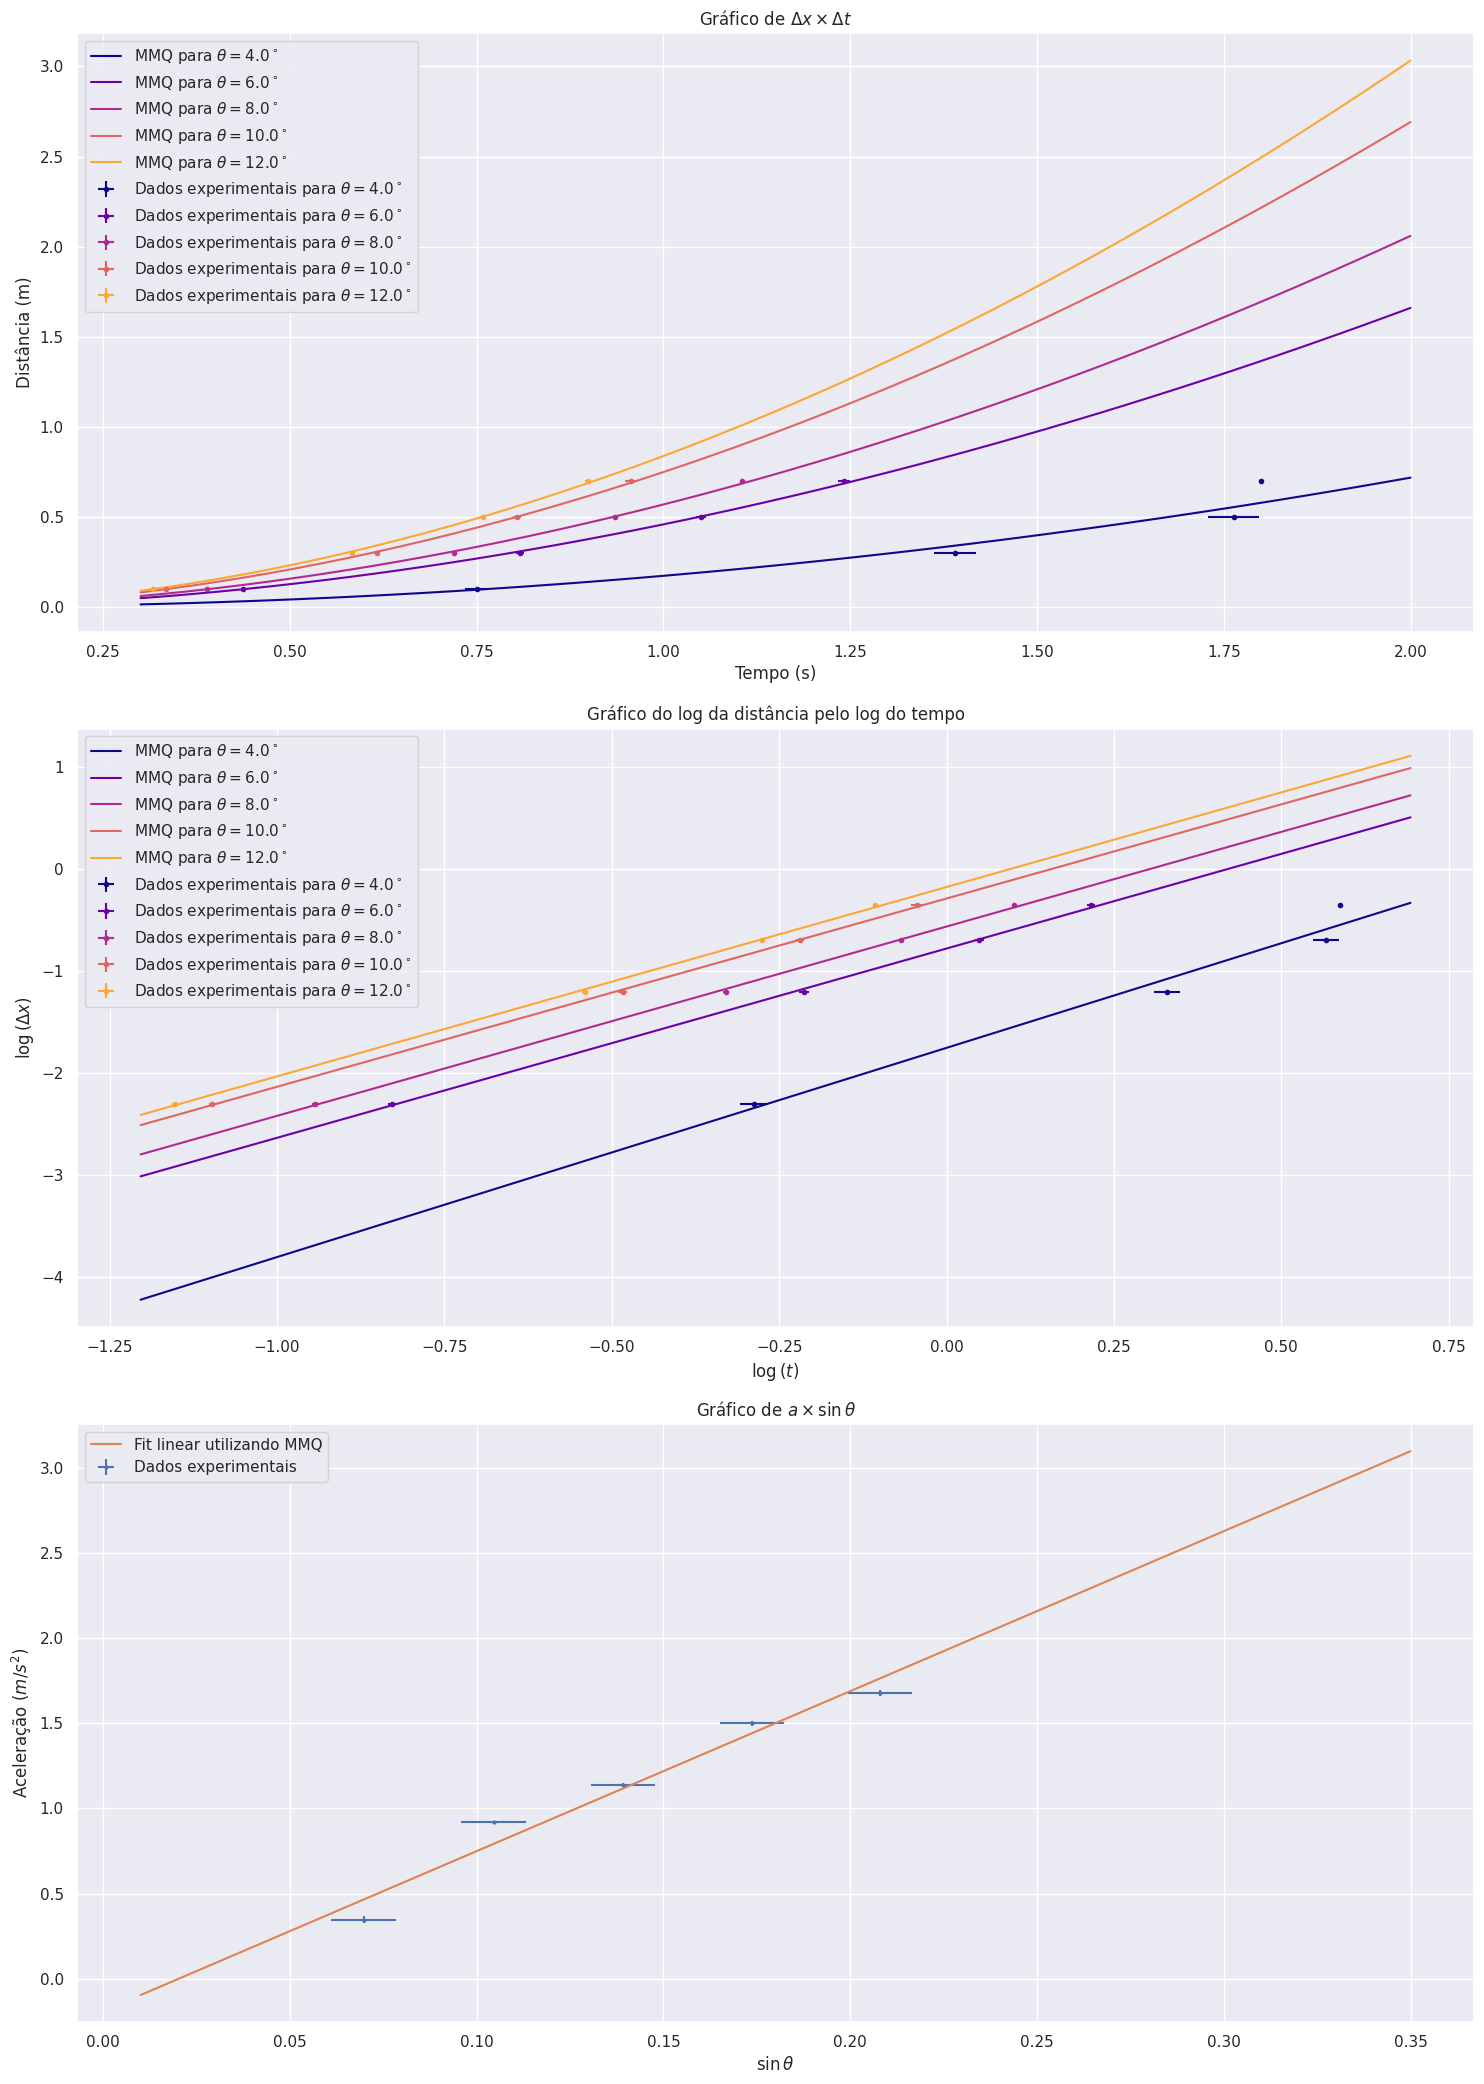

In [ ]:
t = np.array([
    [# Dados da primeira tabela
    [0.78295, 0.72245, 0.70405, 0.77015, 0.77015],
    [1.45535, 1.33725, 1.31135, 1.42370, 1.42330],
    [1.84625, 1.69810, 1.66885, 1.80145, 1.80145],
    [1.80330, 1.79385, 1.79295, 1.80975, 1.79975],
    ],
    [# Dados da quarta tabela
    [0.43300, 0.44170, 0.43395, 0.44510, 0.43005],
    [0.79815, 0.81560, 0.80260, 0.82650, 0.79730],
    [1.03675, 1.05825, 1.04305, 1.07385, 1.03795],
    [1.22585, 1.24965, 1.23340, 1.26855, 1.22875],
    ],
    [# Dados da terceira tabela
    [0.38520, 0.39235, 0.38980, 0.39040, 0.38740],
    [0.71080, 0.72470, 0.71875, 0.72370, 0.71665],
    [0.92440, 0.94205, 0.93405, 0.94085, 0.93190],
    [1.09410, 1.11410, 1.10485, 1.11275, 1.10250],
    ],
    [# Dados da segunda tabela
    [0.33445, 0.33980, 0.32960, 0.33125, 0.33475],
    [0.61930, 0.62985, 0.60765, 0.60805, 0.61700],
    [0.80755, 0.82065, 0.79255, 0.79250, 0.80400],
    [0.97765, 0.97230, 0.94045, 0.94005, 0.95320],
    ],
    [# Dados da primeira tabela
    [0.31370, 0.31725, 0.31645, 0.32040, 0.31240],
    [0.57805, 0.58365, 0.58495, 0.58910, 0.57640],
    [0.75360, 0.75990, 0.76265, 0.76605, 0.75035],
    [0.89355, 0.90025, 0.90435, 0.90680, 0.88900]
    ]
    ])
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)
for j in range(len(theta)):
  print(r'A aceleração encontrada para $\theta = %.1f ^\circ$ foi de %.5f +/- %.5f m/s^2' % ((180.0/np.pi)*theta[j], acel[j], uacel[j]))

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.3,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 5: Caderno do Jean

Para theta = 4.0 graus:
<t0> = 0.48017 $\pm$ 0.01769
<t1> = 0.90292 $\pm$ 0.00125
<t2> = 1.18745 $\pm$ 0.00055
<t3> = 1.41693 $\pm$ 0.00142
Para o método dos mínimos quadrados, temos que:
a = 1.79257 $\pm$ 0.01457, b = -0.99773 $\pm$ 0.00609, r = 0.99979
A aceleração resultante será a = 0.73743 \pm 0.00449 m/s^2
Para theta = 6.0 graus:
<t0> = 0.42424 $\pm$ 0.00037
<t1> = 0.76647 $\pm$ 0.00102
<t2> = 1.00600 $\pm$ 0.00070
<t3> = 1.17644 $\pm$ 0.00950
Para o método dos mínimos quadrados, temos que:
a = 1.89386 $\pm$ 0.01564, b = -0.68696 $\pm$ 0.00713, r = 0.99976
A aceleração resultante será a = 1.00620 \pm 0.00718 m/s^2
Para theta = 8.0 graus:
<t0> = 0.36759 $\pm$ 0.00072
<t1> = 0.66434 $\pm$ 0.00111
<t2> = 0.86894 $\pm$ 0.00161
<t3> = 1.04366 $\pm$ 0.00053
Para o método dos mínimos quadrados, temos que:
a = 1.86698 $\pm$ 0.00335, b = -0.43548 $\pm$ 0.00183, r = 0.99999
A aceleração resultante será a = 1.29391 \pm 0.00237 m/s^2
Para theta = 10.0 graus:
<t0> = 0.32554 $\pm$ 0.00064
<t1>

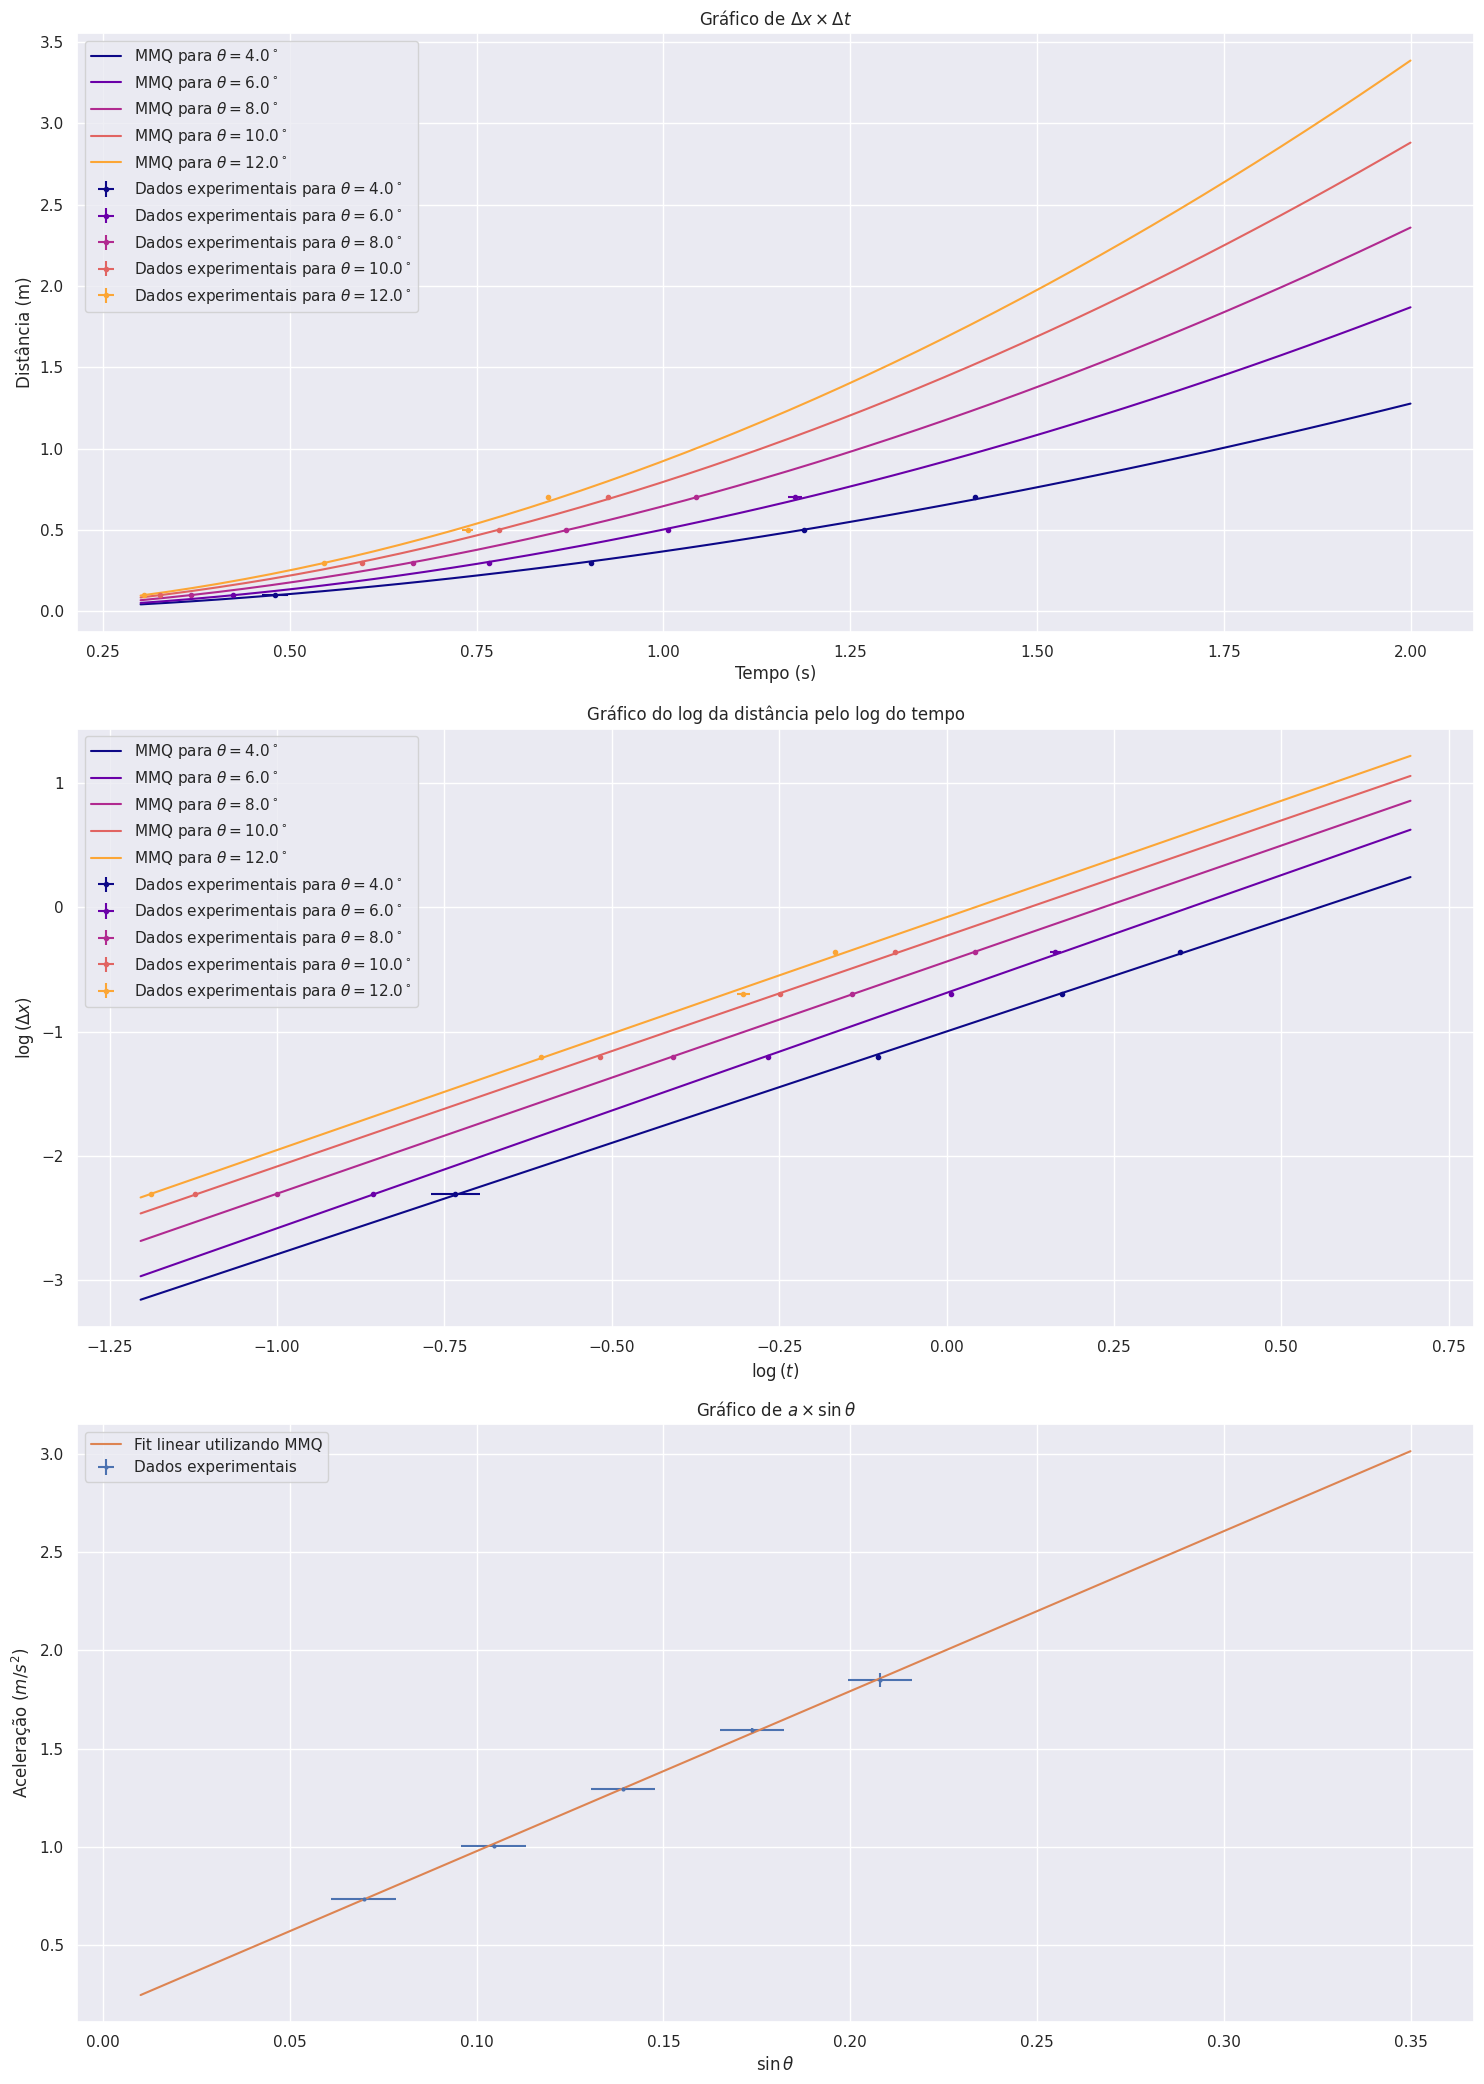

In [ ]:
t = np.array([
    # Tabela 1
    [
        [0.40950, 0.49435, 0.49985, 0.49785, 0.49930],
        [0.90440, 0.89825, 0.90435, 0.90250, 0.90510],
        [1.18755, 1.18775, 1.18745, 1.18555, 1.18895],
        [1.41745, 1.41150, 1.41728, 1.41920, 1.41920]
    ],
    # Tabela 2
    [
        [0.42355, 0.42450, 0.42490, 0.42505, 0.42320],
        [0.76530, 0.76930, 0.76355, 0.76815, 0.76605],
        [1.00350, 1.00755, 1.00595, 1.00710, 1.00590],
        [1.14745, 1.16005, 1.19325, 1.18930, 1.19215]
    ],
    # Tabela 3
    [
        [0.36880, 0.36585, 0.36590, 0.36825, 0.36915],
        [0.66530, 0.66780, 0.66330, 0.66105, 0.66425],
        [0.87245, 0.86980, 0.86815, 0.86315, 0.87115],
        [1.04315, 1.04545, 1.04230, 1.04335, 1.04405]
    ],
    # Tabela 4
    [
        [0.32475, 0.32495, 0.32715, 0.32695, 0.32390],
        [0.59430, 0.59370, 0.59910, 0.59715, 0.59615],
        [0.77815, 0.78105, 0.78270, 0.77740, 0.78090],
        [0.92880, 0.92805, 0.92550, 0.92505, 0.92370]
    ],
    # Tabela 5
    [
        [0.30310, 0.30275, 0.30670, 0.30375, 0.30650],
        [0.54130, 0.54910, 0.54920, 0.54550, 0.54325],
        [0.70900, 0.74605, 0.74525, 0.74605, 0.74390],
        [0.84495, 0.84775, 0.84910, 0.84290, 0.84515]
    ]
]
)
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)
for j in range(len(theta)):
  print(r'A aceleração encontrada para $\theta = %.1f ^\circ$ foi de %.5f +/- %.5f m/s^2' % ((180.0/np.pi)*theta[j], acel[j], uacel[j]))

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.3,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 6: Caderno do Murilo

Para theta = 4.0 graus:
<t0> = 0.58202 $\pm$ 0.00039
<t1> = 1.05949 $\pm$ 0.00120
<t2> = 1.38232 $\pm$ 0.00111
<t3> = 1.64395 $\pm$ 0.00123
Para o método dos mínimos quadrados, temos que:
a = 1.87057 $\pm$ 0.00944, b = -1.29688 $\pm$ 0.00380, r = 0.99991
A aceleração resultante será a = 0.54677 \pm 0.00208 m/s^2
Para theta = 6.0 graus:
<t0> = 0.42696 $\pm$ 0.01218
<t1> = 0.78177 $\pm$ 0.02406
<t2> = 1.02307 $\pm$ 0.03217
<t3> = 1.21866 $\pm$ 0.03875
Para o método dos mínimos quadrados, temos que:
a = 1.85180 $\pm$ 0.00931, b = -0.73323 $\pm$ 0.00423, r = 0.99991
A aceleração resultante será a = 0.96071 \pm 0.00406 m/s^2
Para theta = 8.0 graus:
<t0> = 0.36287 $\pm$ 0.01131
<t1> = 0.68354 $\pm$ 0.00239
<t2> = 0.89233 $\pm$ 0.00238
<t3> = 1.06181 $\pm$ 0.00248
Para o método dos mínimos quadrados, temos que:
a = 1.80577 $\pm$ 0.01917, b = -0.48535 $\pm$ 0.01045, r = 0.99963
A aceleração resultante será a = 1.23096 \pm 0.01286 m/s^2
Para theta = 10.0 graus:
<t0> = 0.33384 $\pm$ 0.00222
<t1>

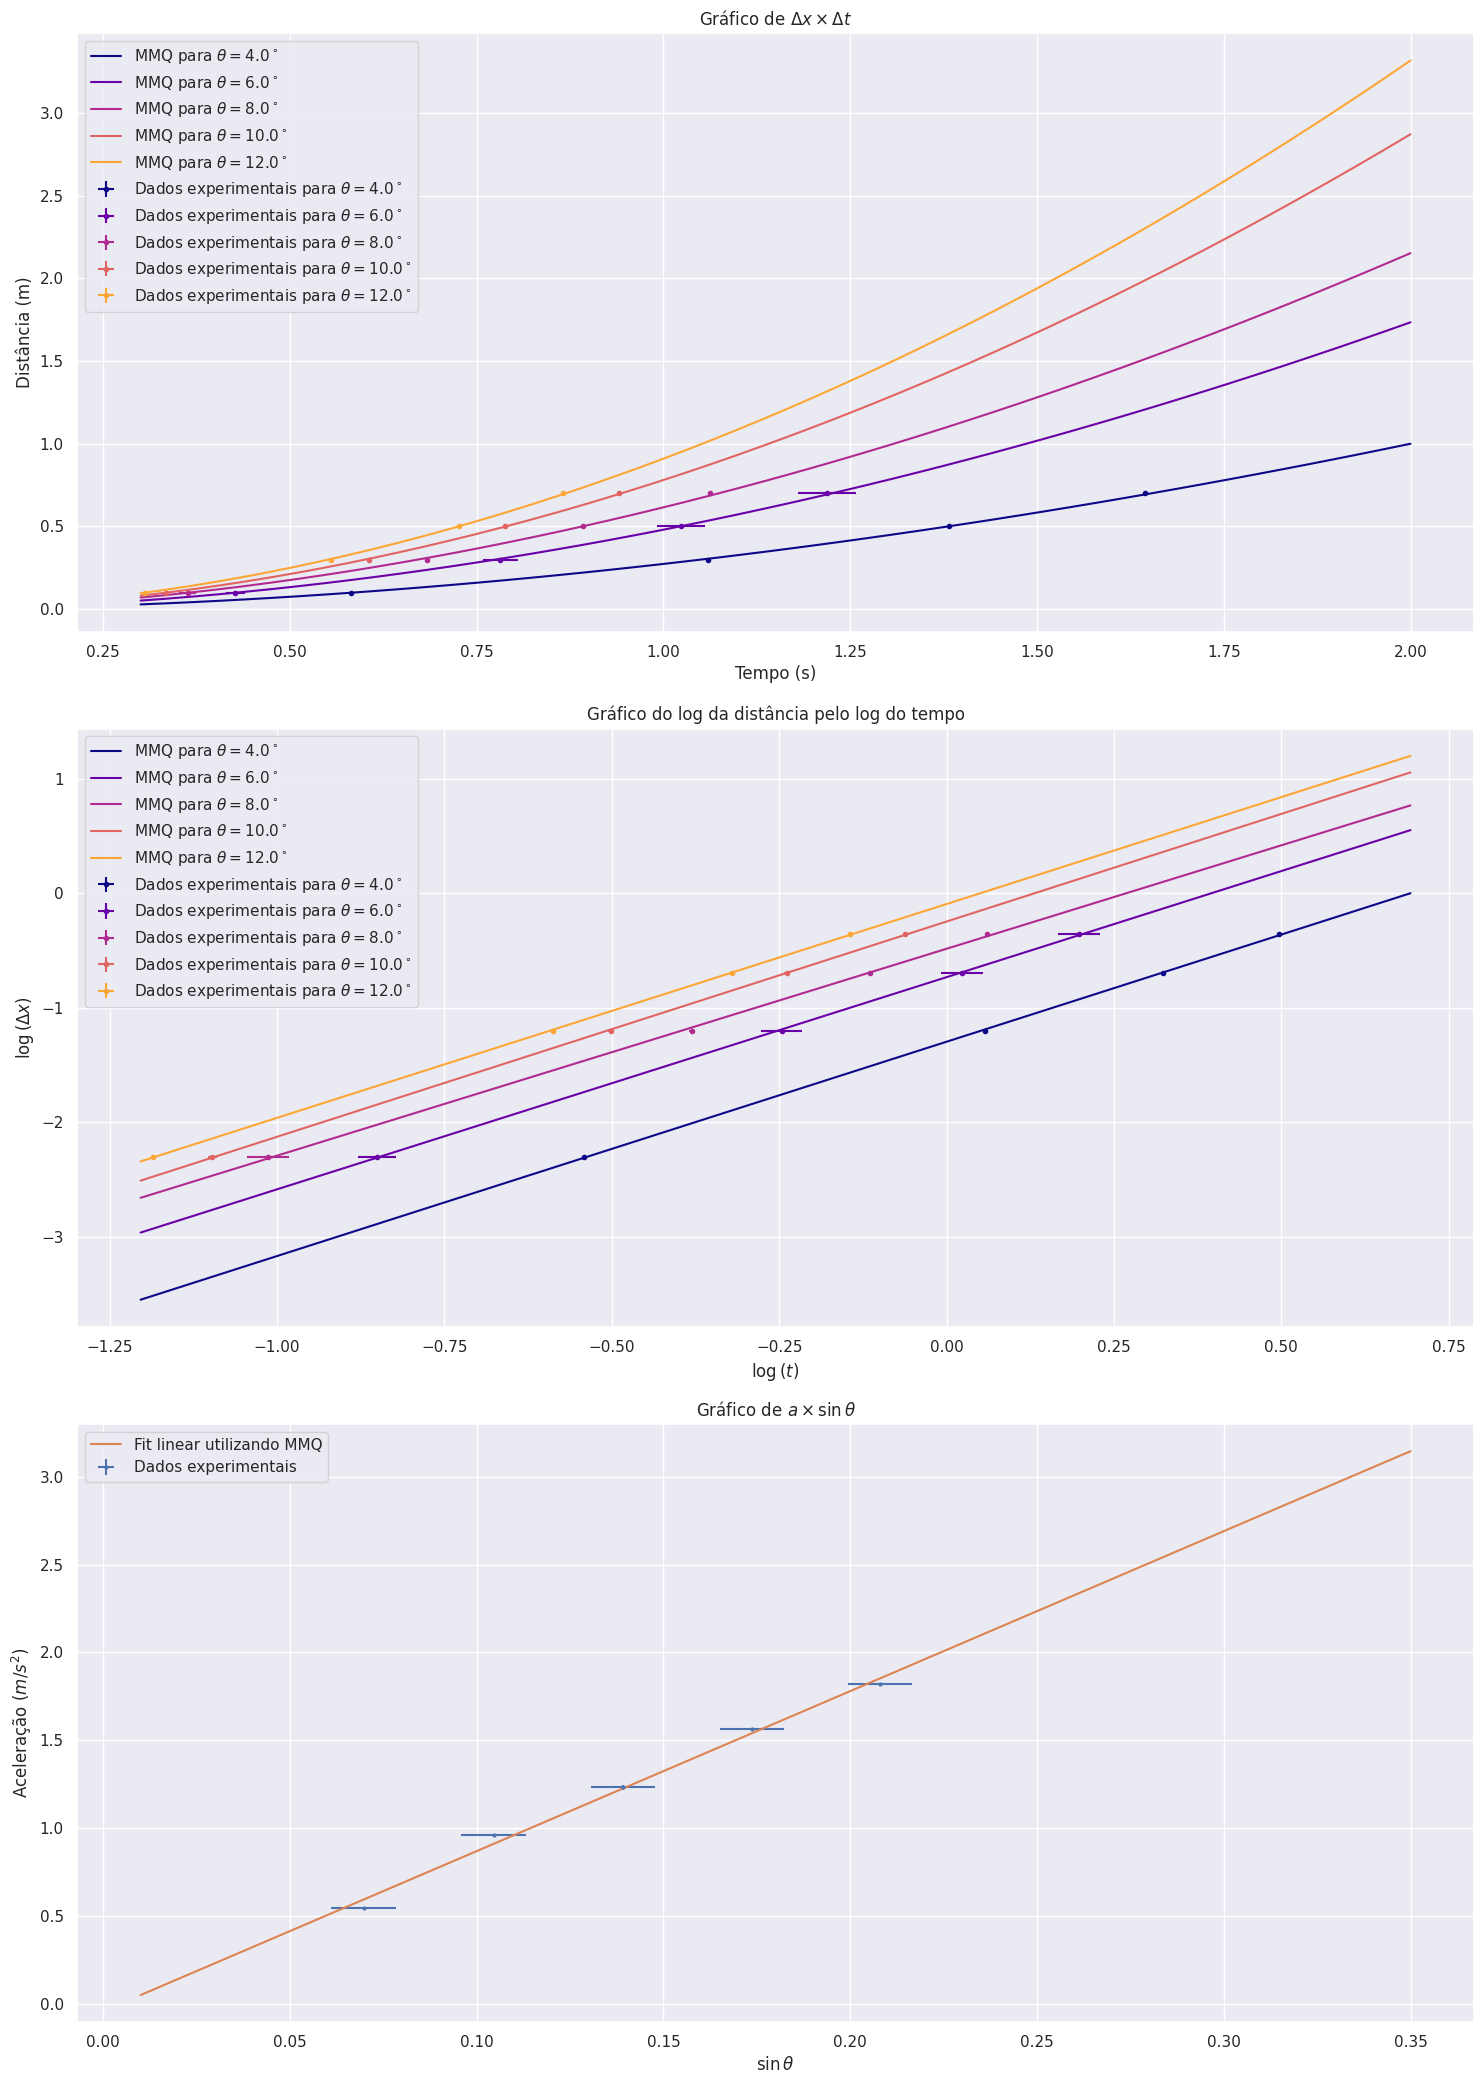

In [ ]:
t = np.array([
    # Tabela 1
    [
        [0.58210, 0.58240, 0.58165, 0.58080, 0.58315],
        [1.06105, 1.05790, 1.06320, 1.05640, 1.05890],
        [1.38105, 1.38175, 1.38645, 1.38000, 1.38235],
        [1.64400, 1.64130, 1.64830, 1.64190, 1.64425]
    ],
    # Tabela 2
    [
        [0.43910, 0.44030, 0.43885, 0.43830, 0.37825],
        [0.80590, 0.80680, 0.80540, 0.80520, 0.68555],
        [1.05545, 1.05595, 1.05475, 1.05480, 0.89440],
        [1.25765, 1.25795, 1.25685, 1.25720, 1.06365]
    ],
    # Tabela 3
    [
        [0.37145, 0.36705, 0.37815, 0.37920, 0.31850],
        [0.68495, 0.67405, 0.68570, 0.68695, 0.68605],
        [0.89390, 0.88285, 0.89475, 0.89515, 0.89500],
        [1.06320, 1.05200, 1.06410, 1.06535, 1.06440]
    ],
    # Tabela 4
    [
        [0.34265, 0.33260, 0.33160, 0.33100, 0.33135],
        [0.61610, 0.60420, 0.60320, 0.60320, 0.60295],
        [0.80115, 0.78800, 0.78780, 0.78135, 0.78215],
        [0.95090, 0.93840, 0.93745, 0.93720, 0.93625]
    ],
    # Tabela 5
    [
        [0.30445, 0.30855, 0.30515, 0.30525, 0.30390],
        [0.55540, 0.55470, 0.55620, 0.55630, 0.55485],
        [0.72605, 0.73055, 0.72085, 0.72695, 0.72560],
        [0.86435, 0.86860, 0.86515, 0.86525, 0.86400]
    ]
]
)
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.3,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 11: Caderno do Arthur

Para theta = 4.0 graus:
<t0> = 0.58812 $\pm$ 0.00930
<t1> = 1.07988 $\pm$ 0.01250
<t2> = 1.42804 $\pm$ 0.00541
<t3> = 1.67923 $\pm$ 0.01580
Para o método dos mínimos quadrados, temos que:
a = 1.84187 $\pm$ 0.01487, b = -1.33280 $\pm$ 0.00615, r = 0.99978
A aceleração resultante será a = 0.52748 \pm 0.00324 m/s^2
Para theta = 6.0 graus:
<t0> = 0.43598 $\pm$ 0.00169
<t1> = 0.83328 $\pm$ 0.02942
<t2> = 1.04274 $\pm$ 0.00229
<t3> = 1.24576 $\pm$ 0.00430
Para o método dos mínimos quadrados, temos que:
a = 1.85009 $\pm$ 0.04153, b = -0.79177 $\pm$ 0.01825, r = 0.99827
A aceleração resultante será a = 0.90609 \pm 0.01654 m/s^2
Para theta = 8.0 graus:
<t0> = 0.38218 $\pm$ 0.00405
<t1> = 0.70823 $\pm$ 0.01537
<t2> = 0.90117 $\pm$ 0.01160
<t3> = 1.07732 $\pm$ 0.00704
Para o método dos mínimos quadrados, temos que:
a = 1.87826 $\pm$ 0.02465, b = -0.51155 $\pm$ 0.01269, r = 0.99939
A aceleração resultante será a = 1.19913 \pm 0.01522 m/s^2
Para theta = 10.0 graus:
<t0> = 0.30586 $\pm$ 0.01890
<t1>

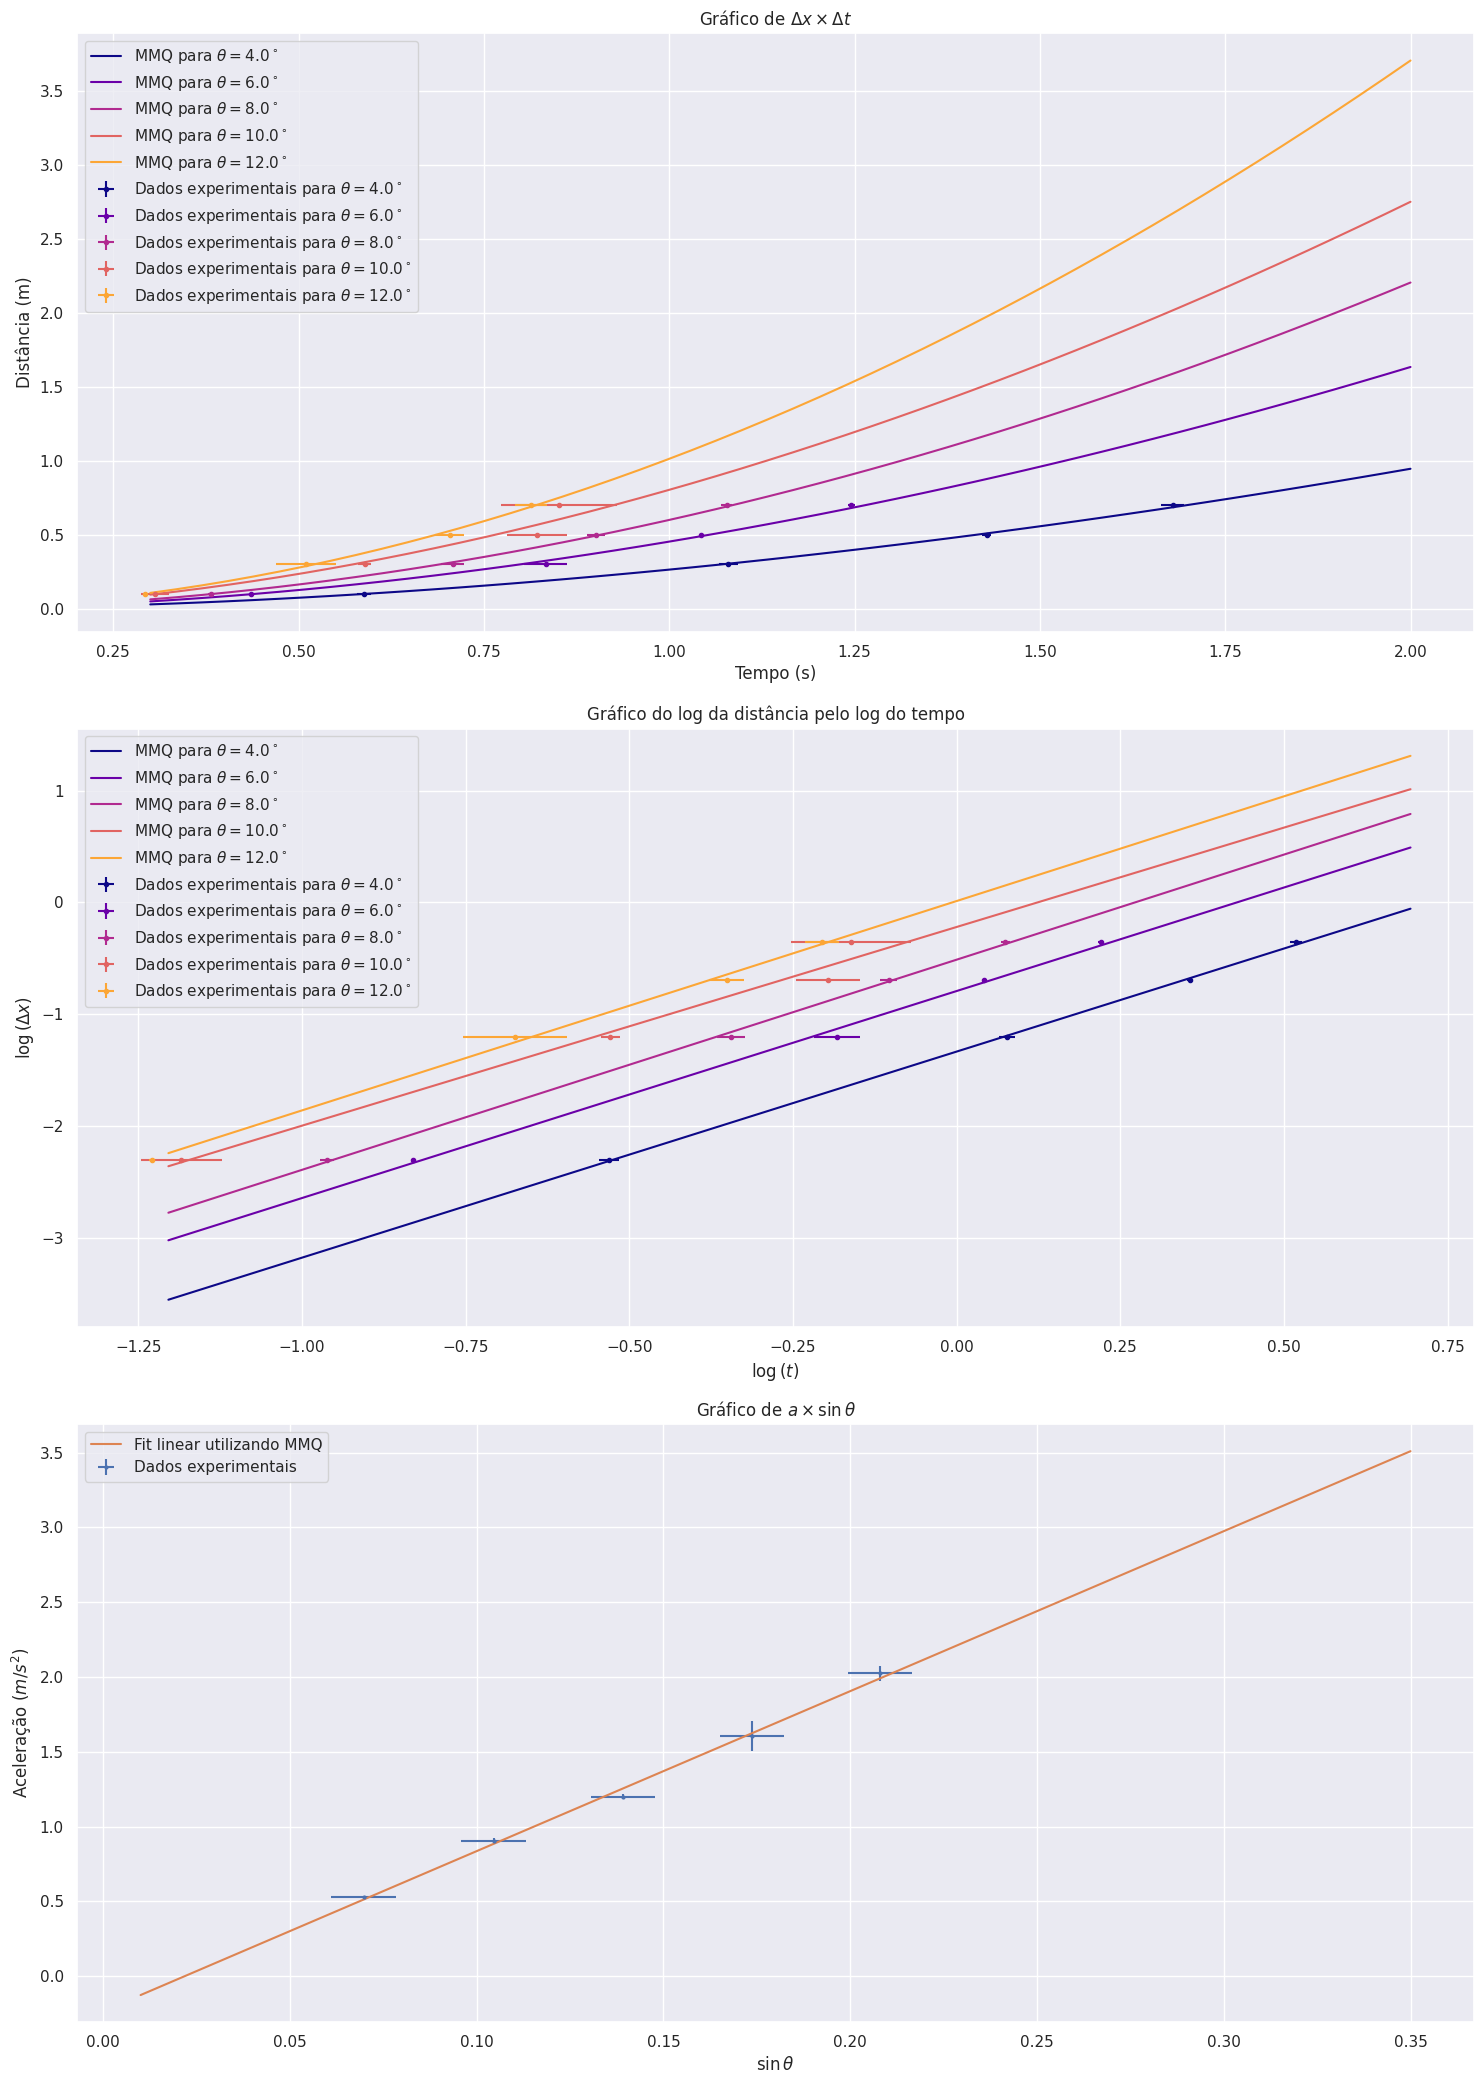

In [ ]:
t = np.array([
    # Tabela 1
    [
        [0.58520, 0.60580, 0.60610, 0.58835, 0.55515],
        [1.07810, 1.10780, 1.10870, 1.05240, 1.05240],
        [1.41630, 1.41630, 1.44500, 1.43130, 1.43130],
        [1.65205, 1.65205, 1.72610, 1.65755, 1.70840]
    ],
    # Tabela 2
    [
        [0.42980, 0.44015, 0.43645, 0.43655, 0.43695],
        [0.95090, 0.80420, 0.80185, 0.80195, 0.80750],
        [1.03705, 1.03745, 1.04545, 1.04566, 1.04810],
        [1.23890, 1.25400, 1.25235, 1.23230, 1.25125]
    ],
    # Tabela 3
    [
        [0.37010, 0.37655, 0.38830, 0.38316, 0.39278],
        [0.68425, 0.69015, 0.76840, 0.70355, 0.69480],
        [0.85890, 0.90395, 0.92530, 0.91880, 0.89890],
        [1.07305, 1.07870, 1.10260, 1.05980, 1.07245]
    ],
    # Tabela 4
    [
        [0.32500, 0.32045, 0.32785, 0.32560, 0.23040],
        [0.59525, 0.59745, 0.59515, 0.55515, 0.60290],
        [0.77945, 0.98190, 0.77885, 0.77855, 0.78815],
        [0.93035, 0.93255, 0.92905, 0.92405, 0.53960]
    ],
    # Tabela 5
    [
        [0.28770, 0.29505, 0.29100, 0.29405, 0.29410],
        [0.58500, 0.53745, 0.35205, 0.53775, 0.53510],
        [0.69100, 0.70225, 0.69730, 0.77225, 0.65580],
        [0.72890, 0.83690, 0.83180, 0.83650, 0.83425]
    ]
]
)
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.3,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 13: Caderno da Lauriely

Para theta = 4.0 graus:
<t0> = 0.44879 $\pm$ 0.00084
<t1> = 0.84156 $\pm$ 0.00095
<t2> = 1.10230 $\pm$ 0.00109
<t3> = 1.32270 $\pm$ 0.00107
Para o método dos mínimos quadrados, temos que:
a = 1.79841 $\pm$ 0.01306, b = -0.87085 $\pm$ 0.00569, r = 0.99983
A aceleração resultante será a = 0.83719 \pm 0.00476 m/s^2
Para theta = 6.0 graus:
<t0> = 0.39107 $\pm$ 0.00069
<t1> = 0.73372 $\pm$ 0.00085
<t2> = 0.96140 $\pm$ 0.00092
<t3> = 1.15370 $\pm$ 0.00096
Para o método dos mínimos quadrados, temos que:
a = 1.79673 $\pm$ 0.01304, b = -0.62483 $\pm$ 0.00652, r = 0.99983
A aceleração resultante será a = 1.07070 \pm 0.00698 m/s^2
Para theta = 8.0 graus:
<t0> = 0.34532 $\pm$ 0.00276
<t1> = 0.64535 $\pm$ 0.00410
<t2> = 0.84403 $\pm$ 0.00469
<t3> = 1.01158 $\pm$ 0.00501
Para o método dos mínimos quadrados, temos que:
a = 1.80847 $\pm$ 0.01316, b = -0.38890 $\pm$ 0.00765, r = 0.99983
A aceleração resultante será a = 1.35561 \pm 0.01037 m/s^2
Para theta = 10.0 graus:
<t0> = 0.29974 $\pm$ 0.00078
<t1>

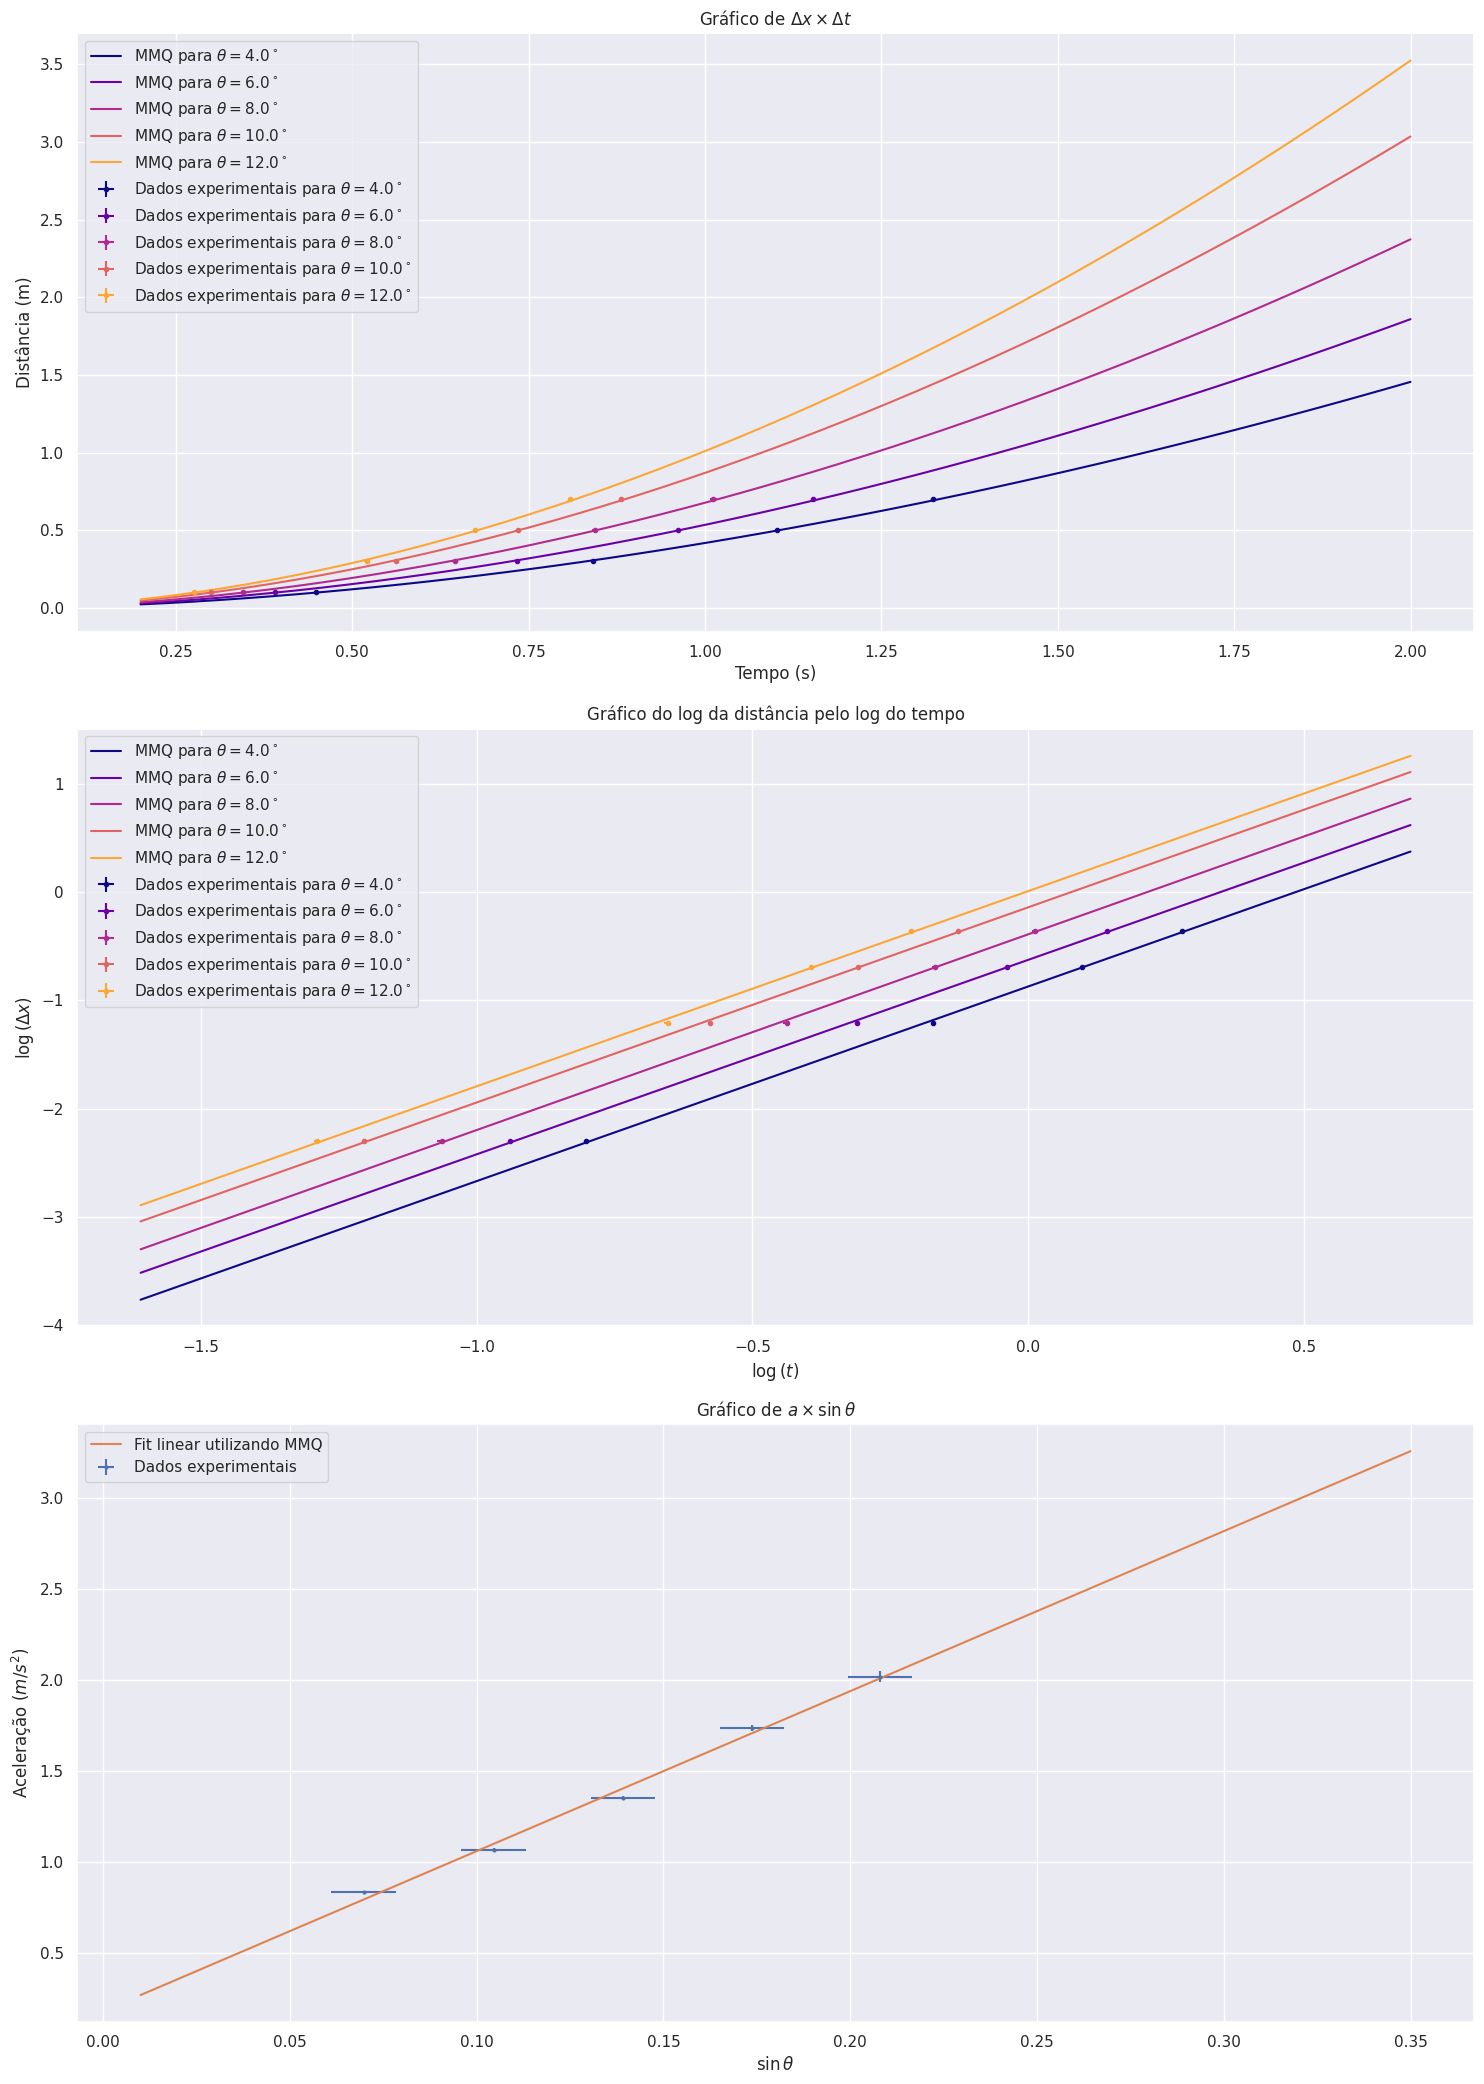

In [ ]:
t = np.array([
    # Tabela 1
    [
        [0.44800, 0.45060, 0.44685, 0.45100, 0.44750],
        [0.84035, 0.84375, 0.83980, 0.84400, 0.83990],
        [1.10095, 1.10490, 1.10020, 1.10500, 1.10045],
        [1.32115, 1.32540, 1.32060, 1.32520, 1.32115]
    ],
    # Tabela 2
    [
        [0.39375, 0.39090, 0.38995, 0.39050, 0.39025],
        [0.73705, 0.73335, 0.73235, 0.73305, 0.73280],
        [0.96500, 0.96090, 0.95995, 0.96075, 0.96040],
        [1.15745, 1.15320, 1.15215, 1.15310, 1.15260]
    ],
    # Tabela 3
    [
        [0.34345, 0.34685, 0.34010, 0.35530, 0.34090],
        [0.64280, 0.64890, 0.63730, 0.65955, 0.63820],
        [0.84135, 0.84840, 0.83470, 0.86005, 0.83565],
        [1.00880, 1.01645, 1.00155, 1.02855, 1.00255]
    ],
    # Tabela 4
    [
        [0.30275, 0.29975, 0.29885, 0.29890, 0.29845],
        [0.56860, 0.55955, 0.55975, 0.55870, 0.55995],
        [0.74360, 0.73185, 0.73290, 0.73110, 0.73355],
        [0.89090, 0.87745, 0.87880, 0.87670, 0.87985]
    ],
    # Tabela 5
    [
        [0.27405, 0.27430, 0.27370, 0.27975, 0.27445],
        [0.51340, 0.51425, 0.52060, 0.52105, 0.53205],
        [0.67215, 0.67335, 0.67510, 0.67595, 0.67485],
        [0.80640, 0.80770, 0.81055, 0.81140, 0.80945]
    ]
]
)
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.2,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 15: Caderno do Eduardo

Para theta = 4.0 graus:
<t0> = 0.47045 $\pm$ 0.00302
<t1> = 0.84908 $\pm$ 0.00385
<t2> = 1.11472 $\pm$ 0.00445
<t3> = 1.32845 $\pm$ 0.00479
Para o método dos mínimos quadrados, temos que:
a = 1.87199 $\pm$ 0.00370, b = -0.89337 $\pm$ 0.00153, r = 0.99999
A aceleração resultante será a = 0.81855 \pm 0.00126 m/s^2
Para theta = 6.0 graus:
<t0> = 0.39779 $\pm$ 0.00109
<t1> = 0.71808 $\pm$ 0.00150
<t2> = 0.94651 $\pm$ 0.00524
<t3> = 1.12318 $\pm$ 0.00214
Para o método dos mínimos quadrados, temos que:
a = 1.86902 $\pm$ 0.00592, b = -0.58221 $\pm$ 0.00293, r = 0.99996
A aceleração resultante será a = 1.11732 \pm 0.00327 m/s^2
Para theta = 8.0 graus:
<t0> = 0.35823 $\pm$ 0.00308
<t1> = 0.64508 $\pm$ 0.00407
<t2> = 0.84768 $\pm$ 0.00471
<t3> = 0.99979 $\pm$ 0.01359
Para o método dos mínimos quadrados, temos que:
a = 1.88737 $\pm$ 0.00939, b = -0.36979 $\pm$ 0.00530, r = 0.99991
A aceleração resultante será a = 1.38176 \pm 0.00732 m/s^2
Para theta = 10.0 graus:
<t0> = 0.32069 $\pm$ 0.00351
<t1>

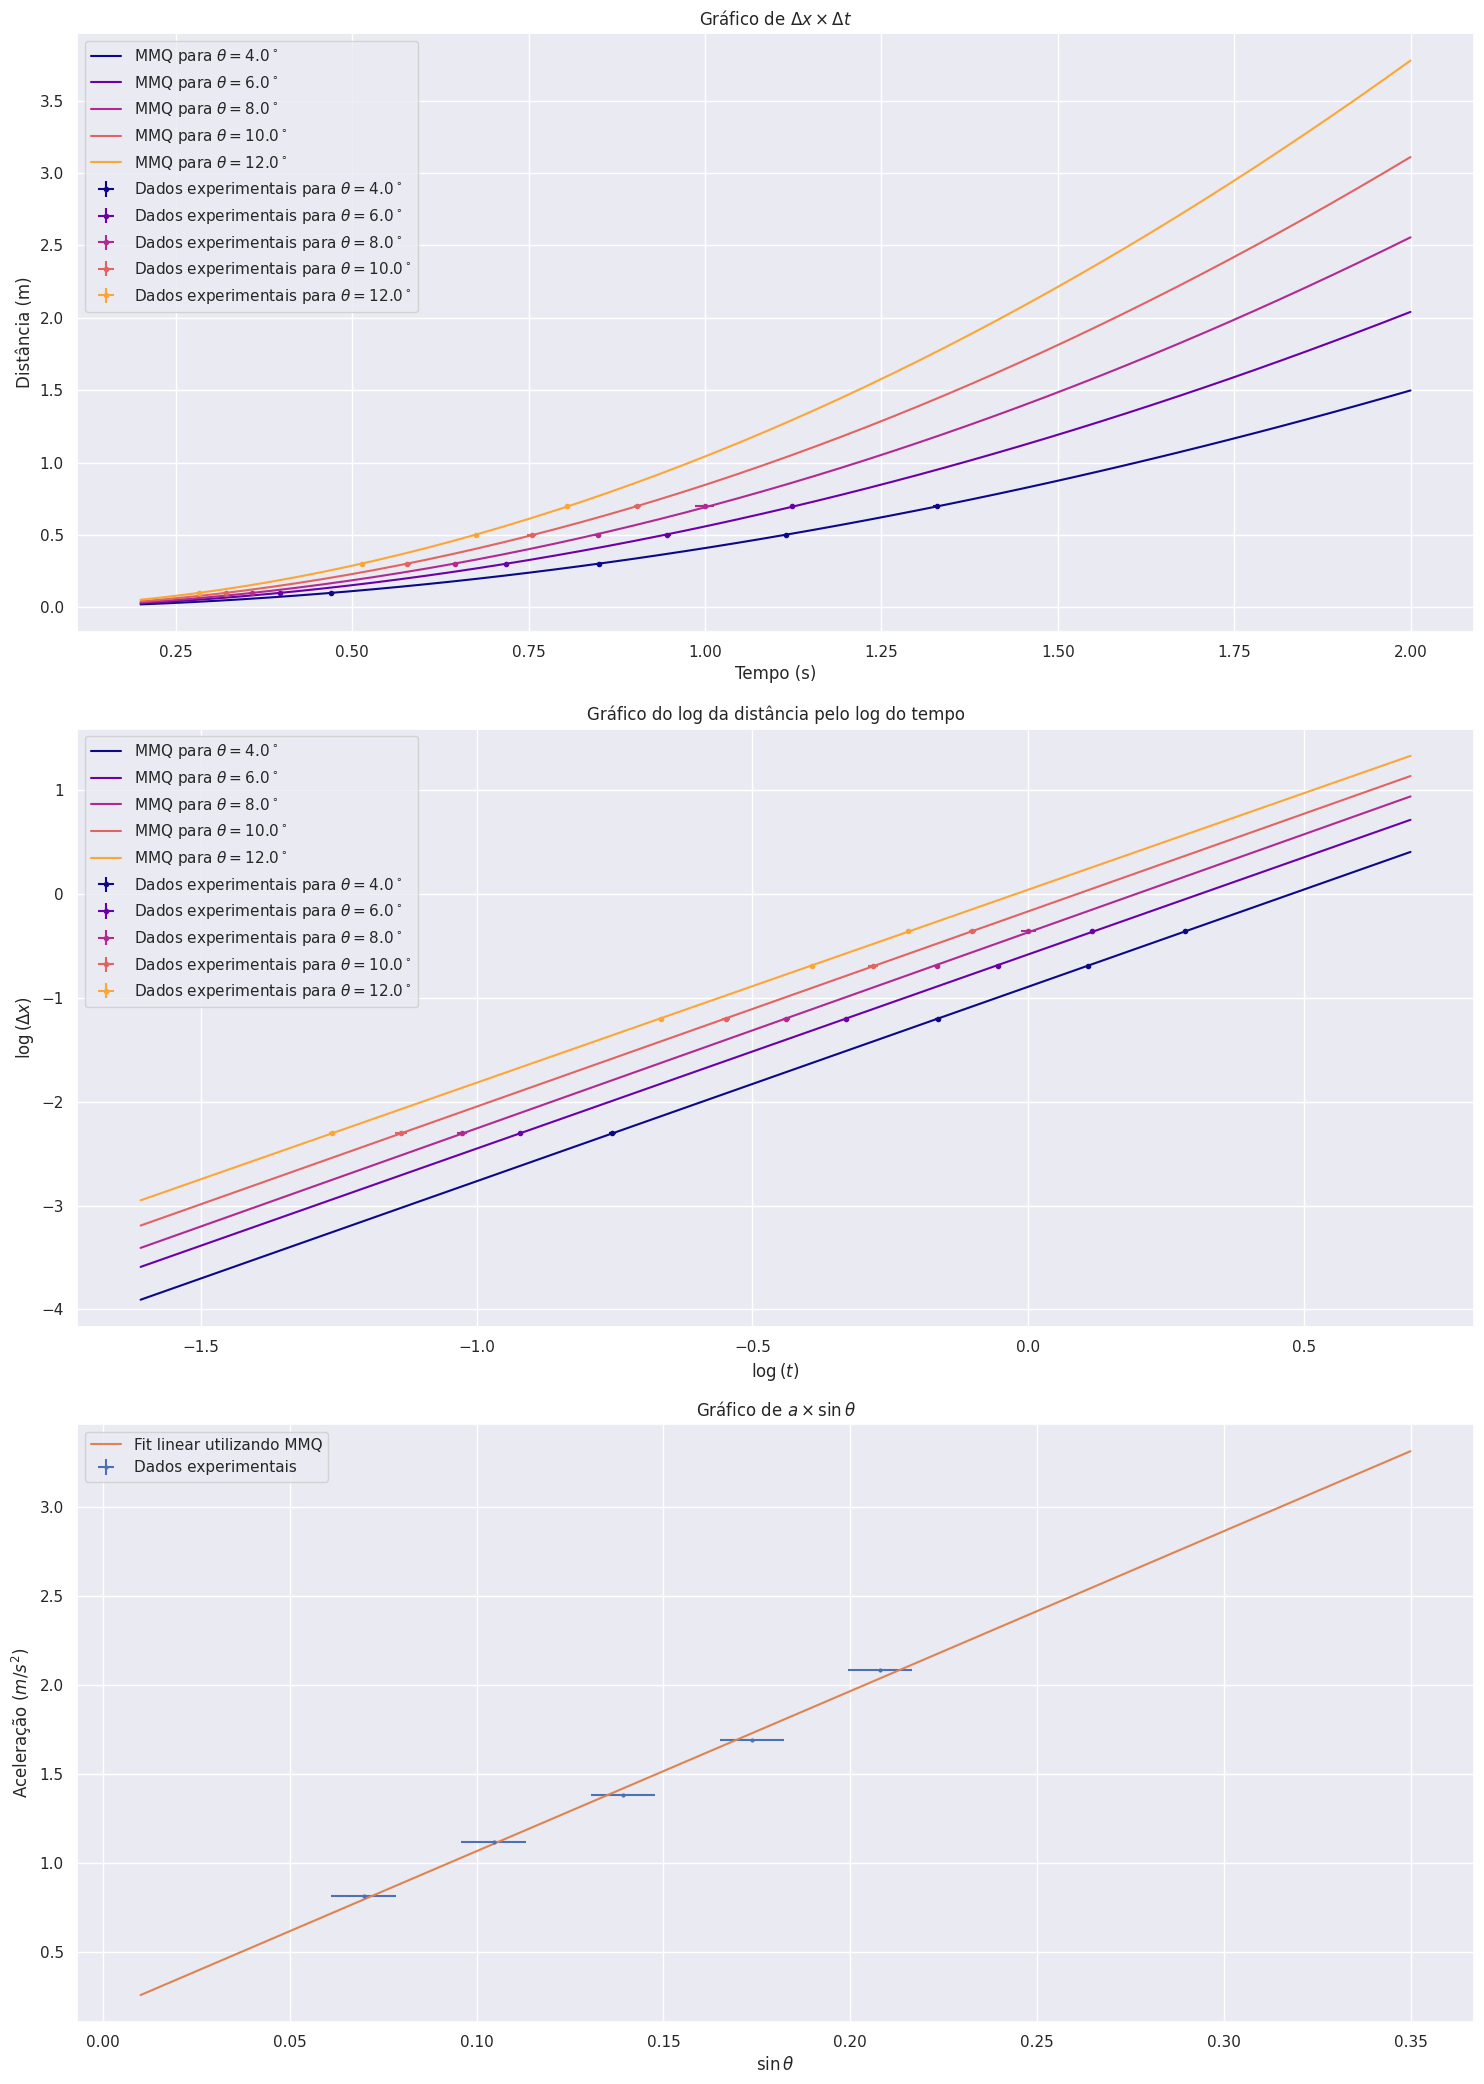

In [ ]:
t = np.array([
    # Tabela 1
    [
        [0.46525, 0.48230, 0.46775, 0.46865, 0.46830],
        [0.84360, 0.86435, 0.84500, 0.84605, 0.84640],
        [1.11000, 1.13250, 1.10935, 1.11080, 1.11095],
        [1.32410, 1.34755, 1.32240, 1.32410, 1.32410]
    ],
    # Tabela 2
    [
        [0.39550, 0.39680, 0.40025, 0.40055, 0.39585],
        [0.71490, 0.71715, 0.72120, 0.72200, 0.71515],
        [0.93825, 0.94220, 0.96640, 0.94730, 0.93840],
        [1.11830, 1.12320, 1.12745, 1.12845, 1.11850]
    ],
    # Tabela 3
    [
        [0.35740, 0.36145, 0.35170, 0.35230, 0.36830],
        [0.64465, 0.64430, 0.63730, 0.63885, 0.66030],
        [0.84665, 0.85095, 0.83670, 0.84035, 0.86375],
        [1.00840, 1.01345, 0.94785, 1.00245, 1.02680]
    ],
    # Tabela 4
    [
        [0.31960, 0.31610, 0.31685, 0.31640, 0.33450],
        [0.57685, 0.57250, 0.57325, 0.57370, 0.59525],
        [0.73750, 0.75185, 0.75310, 0.75335, 0.77745],
        [0.90290, 0.89650, 0.89805, 0.89820, 0.92370]
    ],
    # Tabela 5
    [
        [0.28205, 0.28845, 0.28175, 0.28080, 0.28080],
        [0.51185, 0.52125, 0.51245, 0.51075, 0.51060],
        [0.67245, 0.68825, 0.67305, 0.67205, 0.67105],
        [0.80205, 0.81300, 0.80260, 0.80200, 0.80055]
    ]
]
)
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.2,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bônus: Nosso experimento

In [ ]:
t = np.array()
tmedlist = []
utlist = []
tm = []
utm = []
lnt = np.empty([0, 4])
ulnt = np.empty([0, 4])
a = []
ua = []
b = []
ub = []
r = []
acel = []
uacel = []
for i in range(len(theta)):
  tmedlistlinha = []
  utlistlinha = []
  lntlinha = []
  ulntlinha = []
  print(r'Para theta = %.1f graus:'%((180.0/np.pi)*theta[i]))
  for j in range(len(t[i])):
    tmed = med(t[i,j])
    tmedlistlinha.append(tmed)
    lntmed = np.log(tmed)
    lntlinha.append(lntmed)
    ut = np.sqrt(desv_padrao_med(t[i][j])**2 + uap**2)
    utlistlinha.append(ut)
    print(r'<t%i> = %.5f $\pm$ %.5f'%(j,tmed,ut))
  tmedlist.append(tmedlistlinha)
  utlist.append(utlistlinha)
  tmedlistlinha = np.array(tmedlistlinha)
  utlistlinha = np.array(utlistlinha)
#  tmlinha = med(tmedlistlinha)
#  utmlinha = umed(tmedlistlinha, utlistlinha)
#  tm.append(tmlinha)
#  utm.append(utmlinha)
  alinha,ualinha,blinha,ublinha,rlinha = MMQ(lntlinha,lndx)
  a.append(alinha)
  ua.append(ualinha)
  b.append(blinha)
  ub.append(ublinha)
  r.append(rlinha)
  lntlinha = [lntlinha]
  lntlinha = np.array(lntlinha)
  ulntlinha = [ulntlinha]
  ulntlinha = np.array(ulntlinha)
#  lntmlinha = np.array([med(lntlinha)])
#  lntmlinlinha = medlin(lntlinha) # Média linear dos ln(t)
#  ulntlinlinha = ulin(lntlinha,uln(tmedlistlinha,utlistlinha)) # Erro total linear da média ensinada em sala
  ulntlinha = uln(tmedlistlinha,utlistlinha) # Erro nos ln(t)
#  ulntmlinha = umed(lntlinha, ulntlinha) # Erro do ln(t) médio lembrando de propagar o erro da medida do t
  lnt = np.append(lnt, lntlinha, axis=0)
#  lntm = np.append(lntm, np.array([lntmlinha]))
#  lntmlin = np.append(lntmlin, np.array([lntmlinlinha]), axis=0)
#  ulntlin = np.append(ulntlin, np.array([ulntlinlinha]), axis=0)
  ulnt = np.append(ulnt, np.array([ulntlinha]), axis=0)
#  ulntm = np.append(ulntm, np.array([ulntmlinha]))
  print("Para o método dos mínimos quadrados, temos que:")
  print(r'a = %.5f $\pm$ %.5f, b = %.5f $\pm$ %.5f, r = %.5f'%(alinha,ualinha,blinha,ublinha,rlinha))
  acellinha = 2.0*np.exp(blinha)
  acel.append(acellinha)
  uacellinha = 2.0*np.exp(blinha)*ublinha
  uacel.append(uacellinha)
  print(r'A aceleração resultante será a = %.5f \pm %.5f m/s^2'%(acellinha,uacellinha))

tmedlist = np.array(tmedlist)
utlist = np.array(utlist)
tml = np.array(tm)
utm = np.array(utm)
acel = np.array(acel)
uacel = np.array(uacel)

g,ug,ger,uger,rg = MMQ(senotheta,acel)
print("Assim, a aceleração gravitacional resultante será")
print(r'g = %.5f $\pm$ %.5f m/s^2, com a reta a x seno(theta) desviando da origem por b = %.5f $\pm$ %.5f, r = %.5f'%(g,ug,ger,uger,rg))
tgraf = np.linspace(0.3,2.0, 50)
sengraf = np.linspace(0.01,0.35,50)
lntgraf = np.array([np.log(k) for k in tgraf])
lndxgraf = np.array([[a[k]*j+b[k] for j in lntgraf] for k in range(len(theta))])
dxgraf = np.exp(lndxgraf)
acelgraf = np.array([g*j+ger for j in sengraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 21))
for i in range(len(theta)):
  legendaexp=(r'Dados experimentais para $\theta = %.1f ^\circ$' % ((180.0/np.pi)*theta[i]))
  legendalin=(r'MMQ para $\theta = %.1f ^\circ$'%((180.0/np.pi)*theta[i]))
  ax1.errorbar(tmedlist[i], dx, xerr=utlist[i], yerr=udx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax1.plot(tgraf, dxgraf[i], label=legendalin, color=cmap(i))
  ax2.errorbar(lnt[i], lndx, xerr=ulnt[i], yerr=ulndx, marker='o', label=legendaexp, markersize=3, linestyle='none', color=cmap(i))
  ax2.plot(lntgraf, lndxgraf[i], label=legendalin, color=cmap(i))
ax1.set_title(r'Gráfico de $\Delta x \times \Delta t$')
ax1.set_xlabel(r'Tempo (s)')
ax1.set_ylabel(r'Distância (m)')
ax1.legend()
ax2.set_title(r'Gráfico do log da distância pelo log do tempo')
ax2.set_xlabel(r'$\log{(t)}$')
ax2.set_ylabel(r'$\log{(\Delta x)}$')
ax2.legend()
ax3.errorbar(senotheta, acel, xerr=useno, yerr=uacel, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(sengraf, acelgraf, label='Fit linear utilizando MMQ')
ax3.set_title(r'Gráfico de $a \times \sin{\theta}$')
ax3.set_xlabel(r'$\sin{\theta}$')
ax3.set_ylabel(r'Aceleração ($m/s^2$)')
ax3.legend()
plt.tight_layout()
plt.show()

# Experimento 7: Lei de Hooke

Este é o mais simples, utiliza-se a força peso para calcular a constante elástica das molas sozinhas, em série e em paralelo, lembrando que

\begin{equation}
m = \frac{k}{g} \Delta y,
\end{equation}

In [ ]:
m = [0.025, 0.035, 0.060, 0.070, 0.095, 0.105, 0.130, 0.140] # Massas utilizadas em kg
g = 9.78 # m/s^2
P = [j*g for j in m] # Força peso
um = 0.00005 # Erro na medida das massas
up = g*um
udy = 0.0005 # Erro na medida da deformação, em metros.

## Bancada 3: Caderno da Ana

Encontramos k = 17.96648 +/- 0.00323 N/m para a mola sozinha e b = 0.03607 +/- 0.00015
Encontramos k = 8.57866 +/- 0.00339 N/m para as molas em série e b = 0.01682 +/- 0.00034
Encontramos k = 33.52868 +/- 0.00420 N/m para as molas em paralelo e b = -0.00063 +/- 0.00011
Assumindo que as molas são iguais, o valor de k em série deveria ser 8.98324 +/- 0.00161 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 4.72 por cento
Assumindo que as molas são iguais, o valor de k em paralelo deveria ser 35.93296 +/- 0.00646 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 7.17 por cento


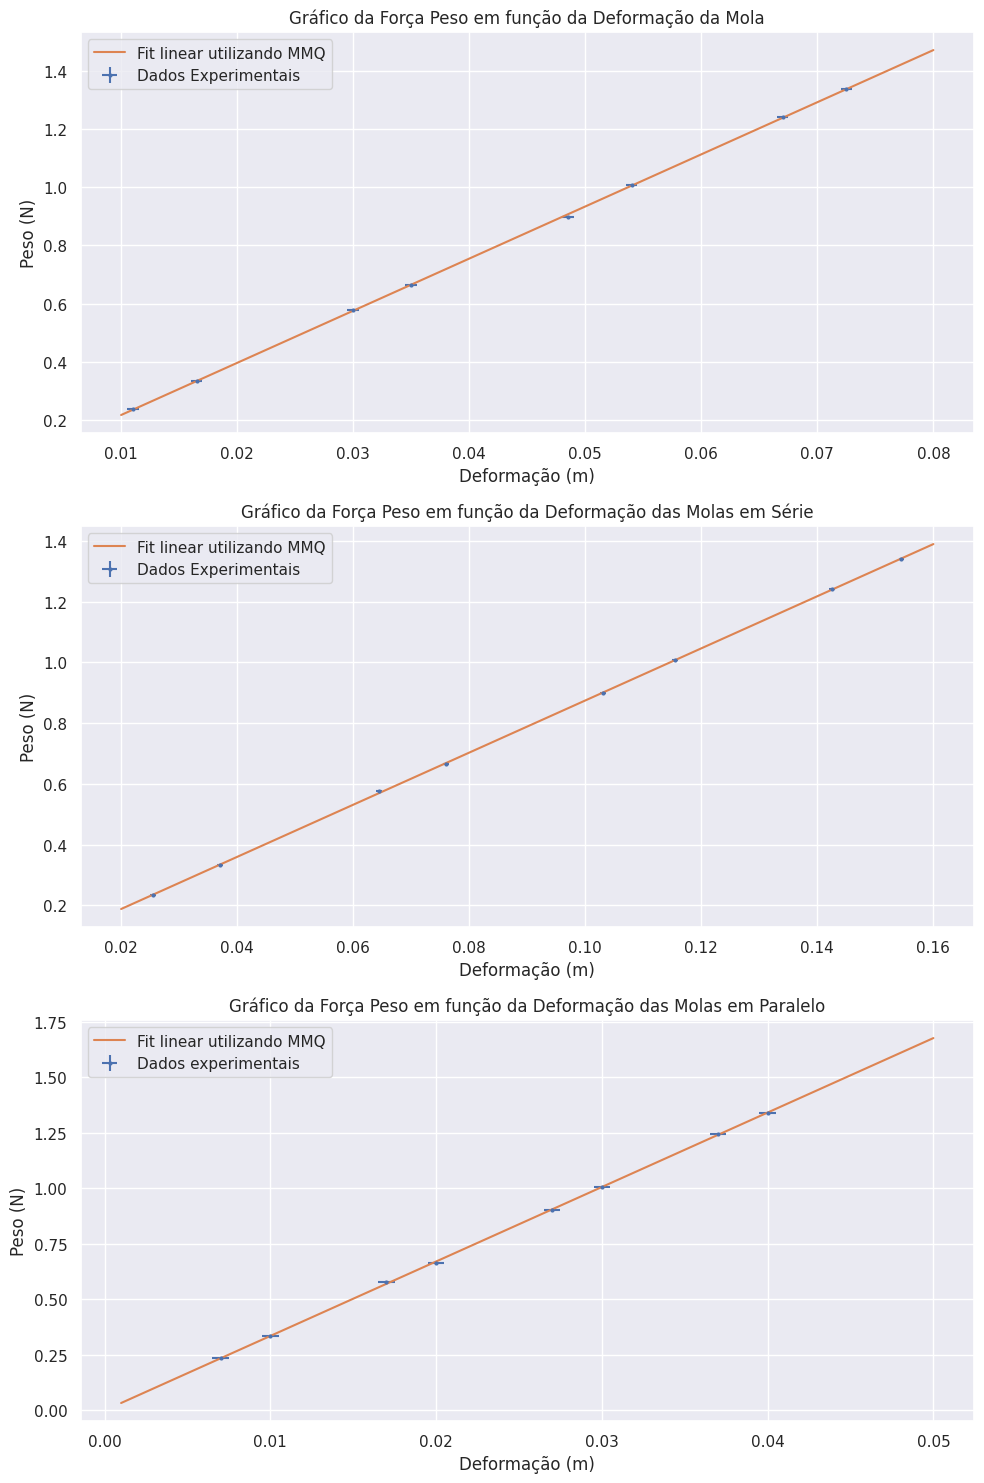

In [ ]:
m = [0.024,0.034, 0.059, 0.068,0.092,0.103,0.127,0.137]
P = [j*g for j in m]
dy = [0.011, 0.0165, 0.03, 0.035, 0.0485, 0.054,0.067,0.0725]
dys = [0.0255, 0.037,0.0645,0.076,0.103, 0.1155, 0.1425, 0.1545]
dyp = [0.007, 0.01, 0.017, 0.02, 0.027, 0.03, 0.037, 0.04]

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha e b = %.5f +/- %.5f"%(k,uk, b, ub))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série e b = %.5f +/- %.5f"%(ks,uks, bs, ubs))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo e b = %.5f +/- %.5f"%(kp,ukp, bp, ubp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.01,0.08, 100)
dysgraf = np.linspace(0.02, 0.16, 100)
dypgraf = np.linspace(0.001,0.05, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 5: Caderno do Jean

Encontramos k = 17.80621 +/- 0.00912 N/m para a mola sozinha e b = 0.03943 +/- 0.00043
Encontramos k = 8.87378 +/- 0.00617 N/m para as molas em série e b = 0.01749 +/- 0.00060
Encontramos k = 34.69424 +/- 0.02235 N/m para as molas em paralelo e b = 0.02402 +/- 0.00055
Assumindo que as molas são iguais, o valor de k em série deveria ser 8.90311 +/- 0.00456 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 0.33 por cento
Assumindo que as molas são iguais, o valor de k em paralelo deveria ser 35.61243 +/- 0.01825 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 2.65 por cento


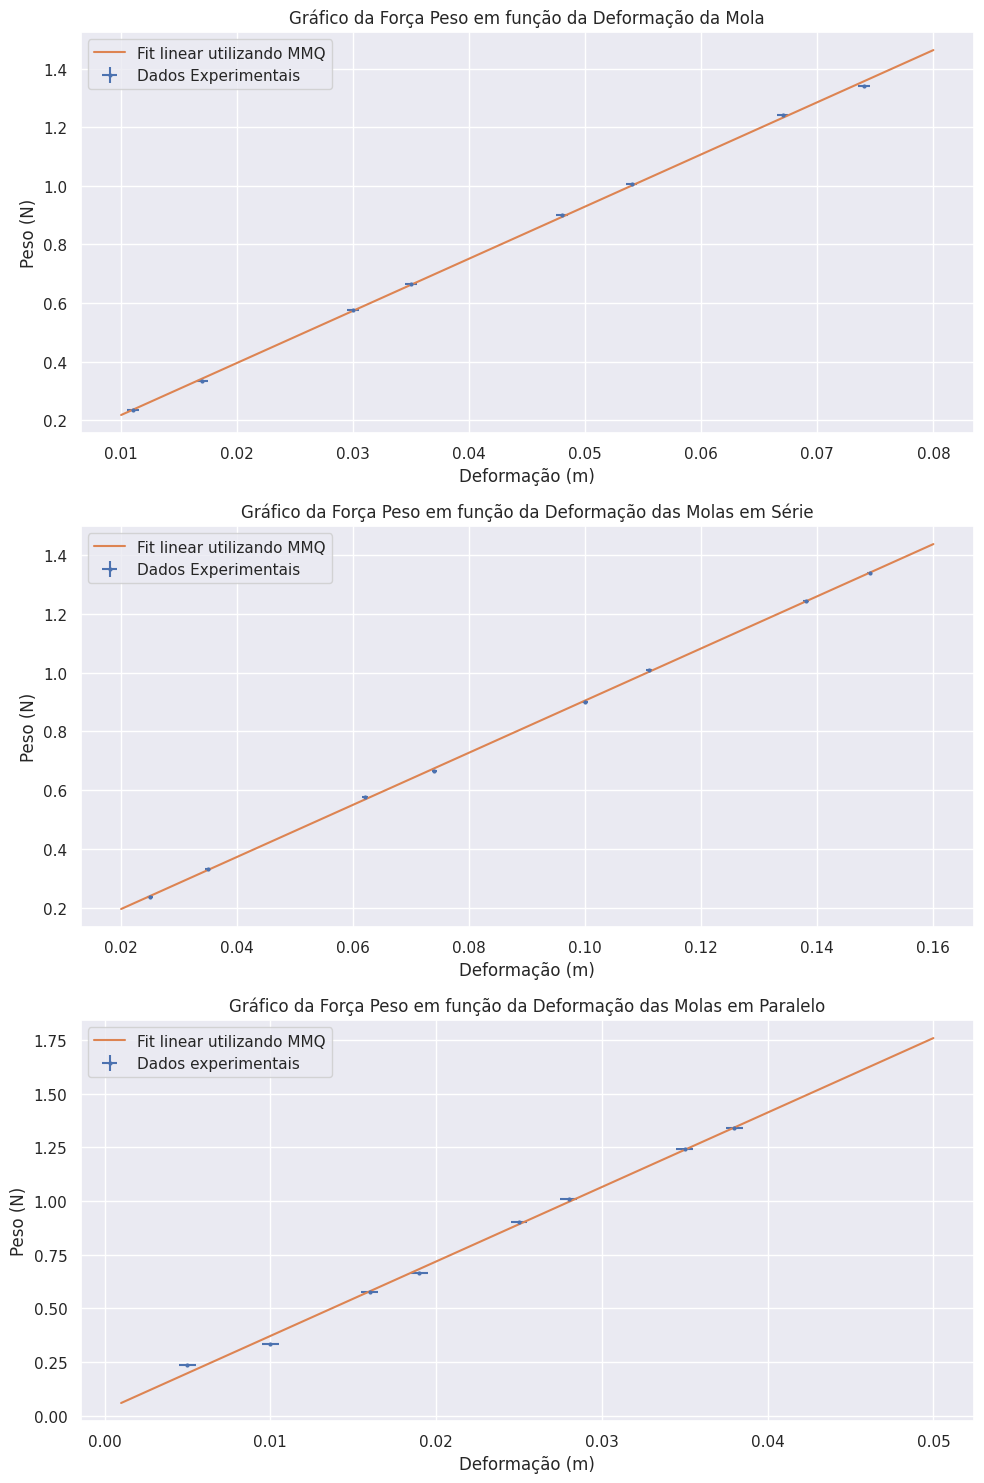

In [ ]:
dy = [0.011, 0.017, 0.03, 0.035, 0.048, 0.054, 0.067,0.074]
dys = [0.025, 0.035,0.062,0.074,0.10, 0.111, 0.138, 0.149]
dyp = [0.005, 0.01, 0.016, 0.019, 0.025, 0.028, 0.035, 0.038]

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha e b = %.5f +/- %.5f"%(k,uk, b, ub))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série e b = %.5f +/- %.5f"%(ks,uks, bs, ubs))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo e b = %.5f +/- %.5f"%(kp,ukp, bp, ubp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.01,0.08, 100)
dysgraf = np.linspace(0.02, 0.16, 100)
dypgraf = np.linspace(0.001,0.05, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 6: Caderno d

In [ ]:
dy = []
dys = []
dyp = []

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha"%(k,uk))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série"%(ks,uks))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo"%(kp,ukp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.01,0.08, 100)
dysgraf = np.linspace(0.02, 0.16, 100)
dypgraf = np.linspace(0.001,0.05, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 11: Caderno do Edivaldo

Encontramos k = 1.81767 +/- 0.02431 N/m para a mola sozinha
Encontramos k = 0.90822 +/- 0.00900 N/m para as molas em série
Encontramos k = 3.53327 +/- 0.01325 N/m para as molas em paralelo
Assumindo que as molas são iguais, o valor de k em série deveria ser 0.90883 +/- 0.01215 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 0.07 por cento
Assumindo que as molas são iguais, o valor de k em paralelo deveria ser 3.63533 +/- 0.04862 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 2.89 por cento


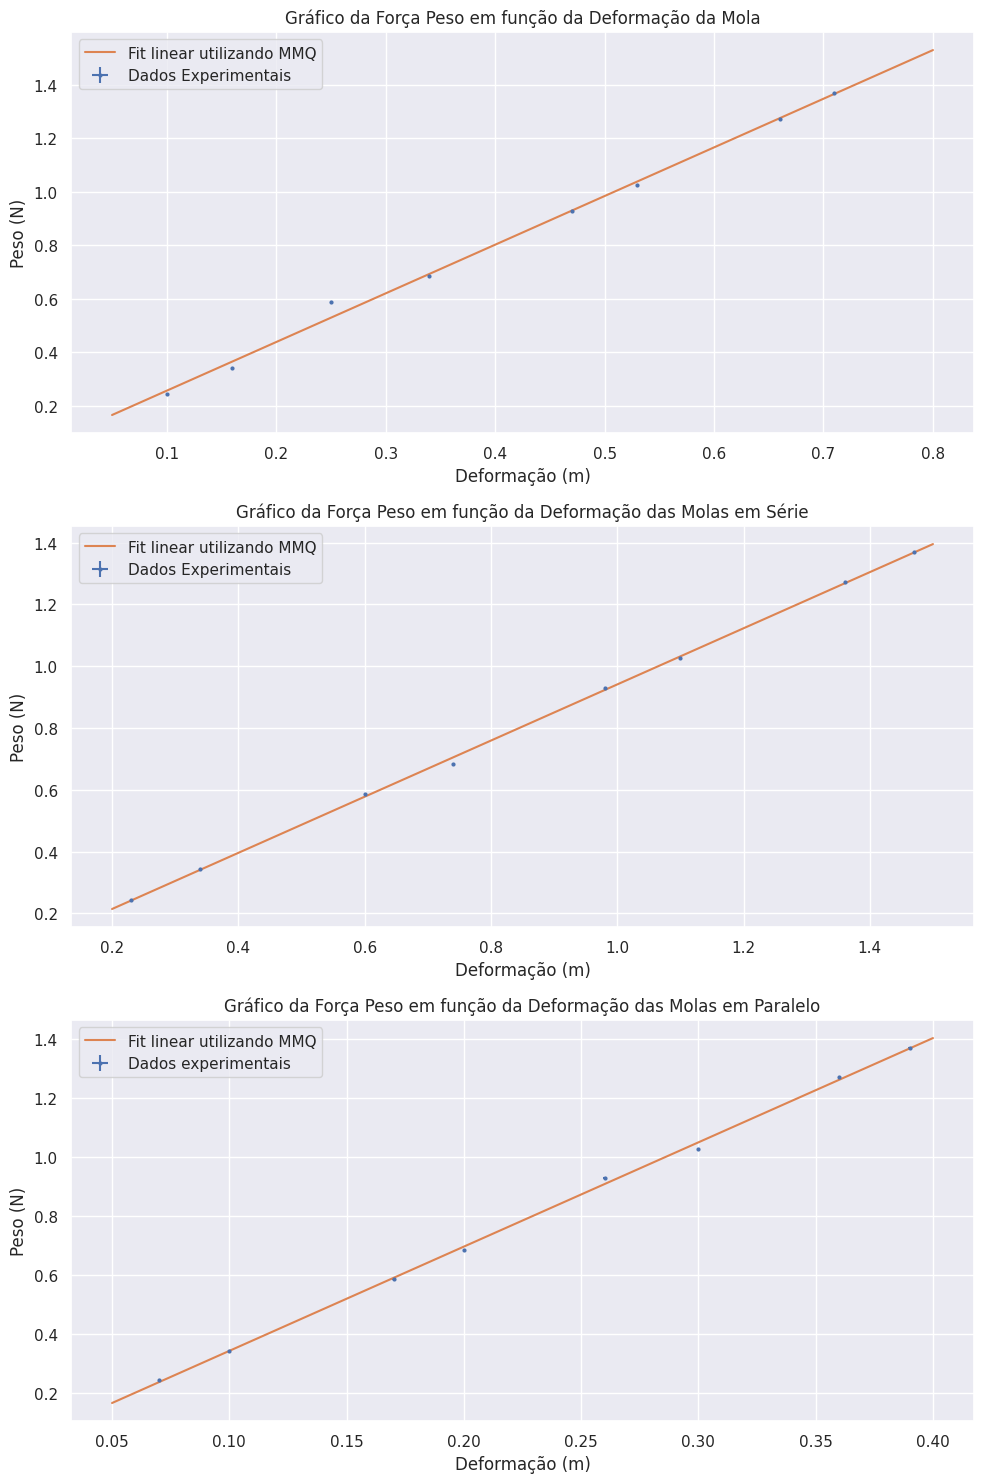

In [ ]:
dy = [0.1, 0.16, 0.25, 0.34, 0.47, 0.53,0.66,0.71]
dys = [0.23, 0.34,0.60,0.74,0.98, 1.10, 1.36, 1.47]
dyp = [0.07, 0.1, 0.17, 0.2, 0.26, 0.3, 0.36, 0.39]

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha"%(k,uk))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série"%(ks,uks))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo"%(kp,ukp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.05,0.8, 100)
dysgraf = np.linspace(0.2, 1.5, 100)
dypgraf = np.linspace(0.05,0.4, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 13: Caderno do Ronaldo

Encontramos k = 17.89069 +/- 0.01428 N/m para a mola sozinha
Encontramos k = 9.18356 +/- 0.01180 N/m para as molas em série
Encontramos k = 35.14031 +/- 0.02452 N/m para as molas em paralelo
Assumindo que as molas são iguais, o valor de k em série deveria ser 8.94534 +/- 0.00714 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 2.59 por cento
Assumindo que as molas são iguais, o valor de k em paralelo deveria ser 35.78137 +/- 0.02857 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 1.82 por cento


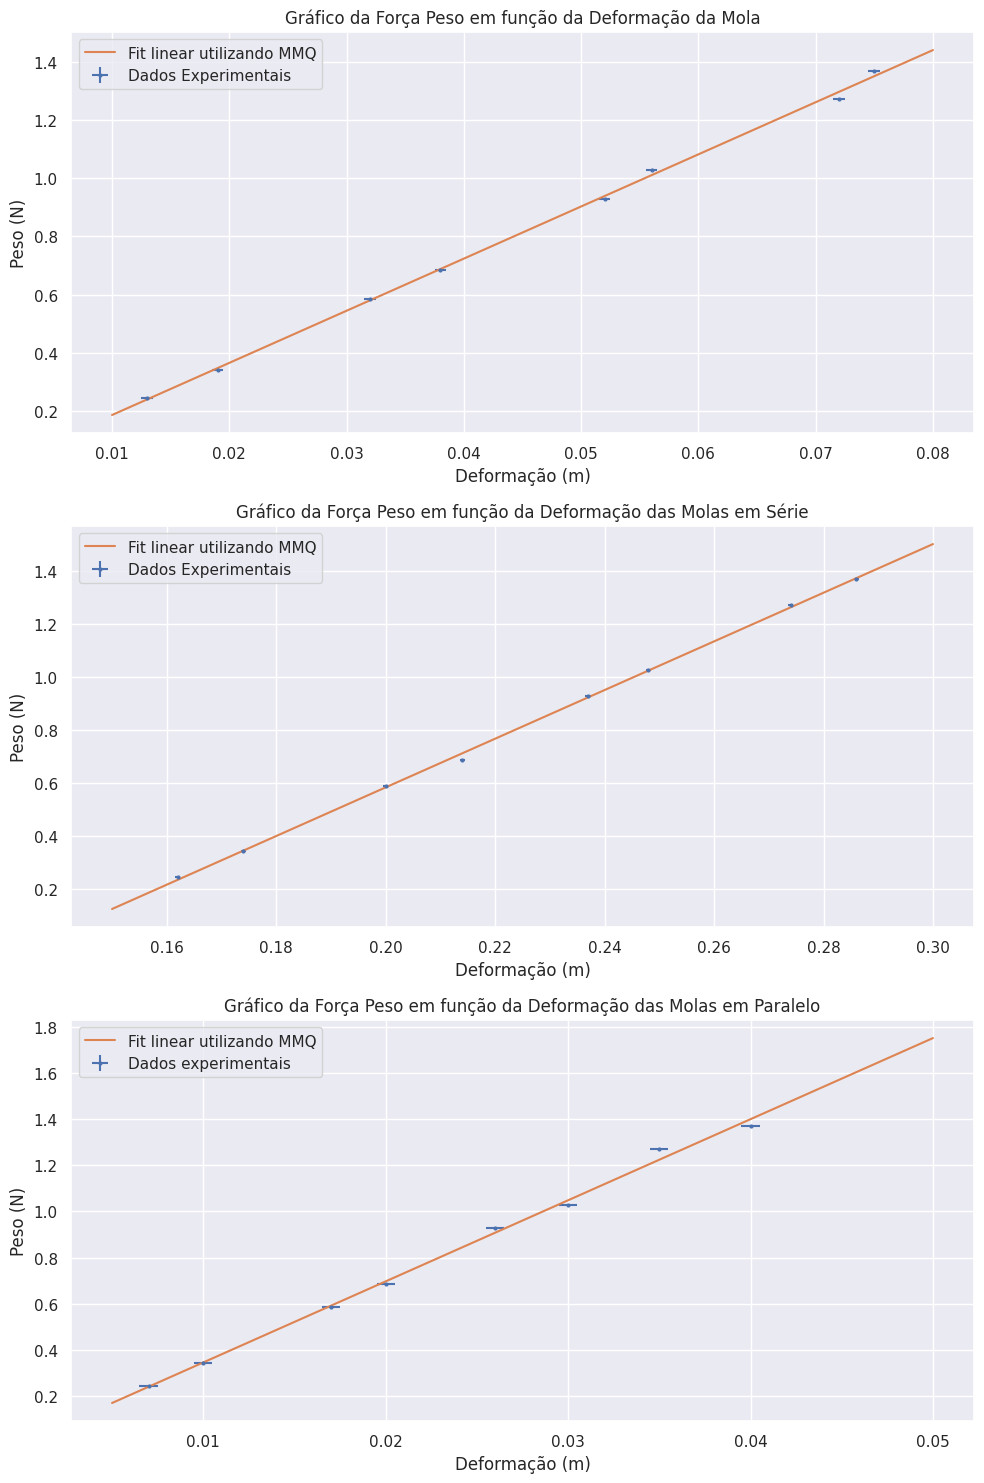

In [ ]:
dy = [0.013, 0.019, 0.032, 0.038, 0.052, 0.056,0.072,0.075]
dys = [0.162, 0.174,0.20,0.214,0.237, 0.248, 0.274, 0.286]
dyp = [0.007, 0.01, 0.017, 0.02, 0.026, 0.03, 0.035, 0.04]

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha"%(k,uk))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série"%(ks,uks))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo"%(kp,ukp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.01,0.08, 100)
dysgraf = np.linspace(0.15, 0.3, 100)
dypgraf = np.linspace(0.005,0.05, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 14: Caderno do Gabriel Maciel

Encontramos k = 17.58059 +/- 0.01955 N/m para a mola sozinha
Encontramos k = 8.15638 +/- 0.00964 N/m para as molas em série
Encontramos k = 34.46879 +/- 0.01536 N/m para as molas em paralelo
Assumindo que as molas são iguais, o valor de k em série deveria ser 8.79030 +/- 0.00977 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 7.77 por cento
Assumindo que as molas são iguais, o valor de k em paralelo deveria ser 35.16119 +/- 0.03909 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 2.01 por cento


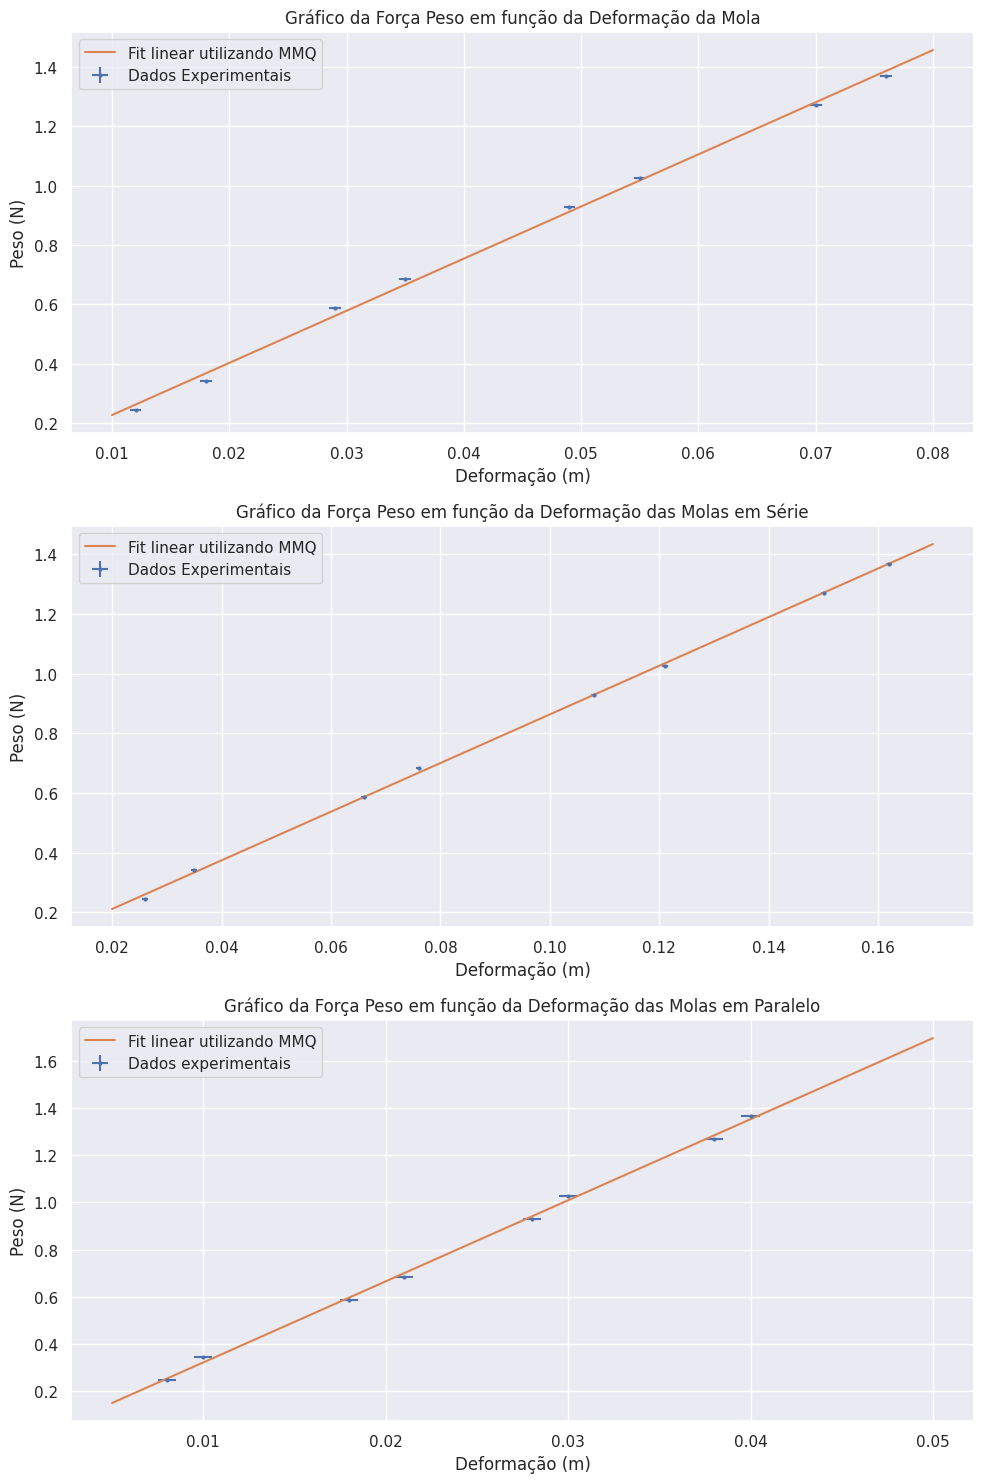

In [ ]:
dy = [0.012, 0.018, 0.029, 0.035, 0.049, 0.055,0.07,0.076]
dys = [0.026, 0.035,0.066,0.076,0.108, 0.121, 0.15, 0.162]
dyp = [0.008, 0.01, 0.018, 0.021, 0.028, 0.03, 0.038, 0.04]

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha"%(k,uk))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série"%(ks,uks))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo"%(kp,ukp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.01,0.08, 100)
dysgraf = np.linspace(0.02, 0.17, 100)
dypgraf = np.linspace(0.005,0.05, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()

## Bancada 15: Caderno do Renan

Encontramos k = 18.81440 +/- 0.09800 N/m para a mola sozinha e b = 0.11189 +/- 0.00411
Encontramos k = 9.14347 +/- 0.09355 N/m para as molas em série e b = 0.09709 +/- 0.00822
Encontramos k = 33.65787 +/- 0.11561 N/m para as molas em paralelo e b = 0.03693 +/- 0.00293
Assumindo que as molas são iguais, o valor de k em série deveria ser 9.40720 +/- 0.04900 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 2.88 por cento
Assumindo que as molas são iguais, o valor de k em paralelo deveria ser 37.62881 +/- 0.19600 N/m
isto é, o desvio relativo entre o valor teórico e o medido foi 11.80 por cento


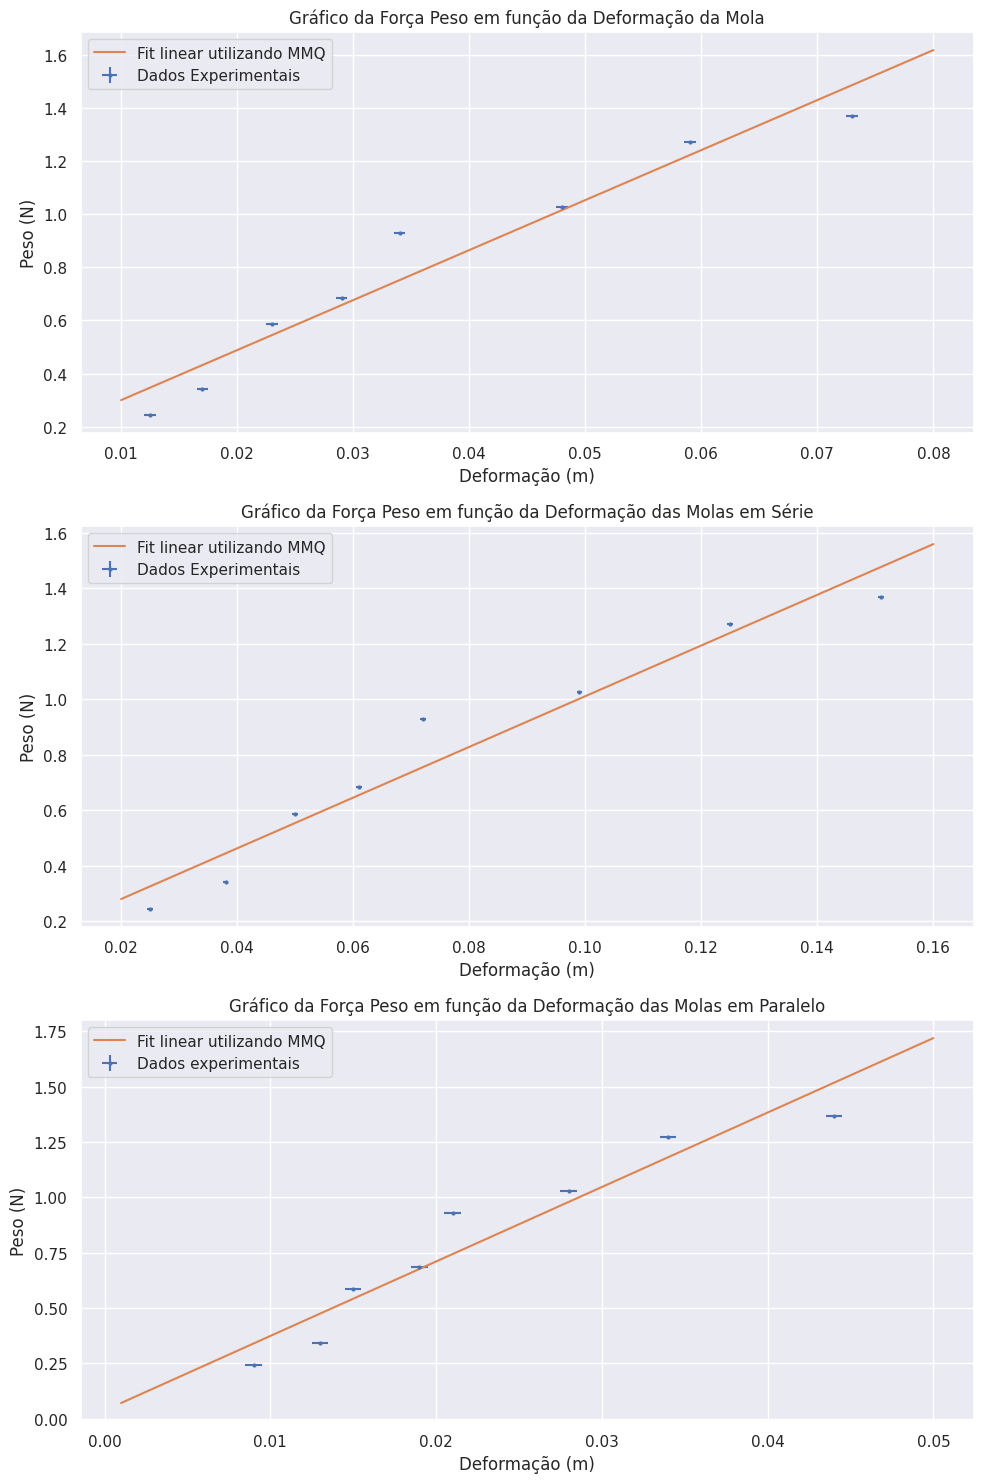

In [ ]:
P = [j*g for j in m]
dy = [0.0125, 0.017, 0.023, 0.029, 0.034, 0.048,0.059,0.073]
dys = [0.025, 0.038,0.05,0.061,0.072, 0.099, 0.125, 0.151]
dyp = [0.009, 0.013, 0.015, 0.019, 0.021, 0.028, 0.034, 0.044]

k,uk,b,ub,r = MMQ(dy,P)
ks, uks, bs, ubs, rs = MMQ(dys,P)
kp, ukp, bp, ubp, rp = MMQ(dyp,P)
kst = k/2.0
ukst = uk/2.0
kpt = 2.0*k
ukpt = 2.0*uk

print("Encontramos k = %.5f +/- %.5f N/m para a mola sozinha e b = %.5f +/- %.5f"%(k,uk, b, ub))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em série e b = %.5f +/- %.5f"%(ks,uks, bs, ubs))
print("Encontramos k = %.5f +/- %.5f N/m para as molas em paralelo e b = %.5f +/- %.5f"%(kp,ukp, bp, ubp))
print("Assumindo que as molas são iguais, o valor de k em série deveria ser %.5f +/- %.5f N/m"%(kst,ukst))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(ks-kst)/ks)))
print("Assumindo que as molas são iguais, o valor de k em paralelo deveria ser %.5f +/- %.5f N/m"%(kpt,ukpt))
print("isto é, o desvio relativo entre o valor teórico e o medido foi %.2f por cento"%(np.absolute(100.0*(kp-kpt)/kp)))

dygraf = np.linspace(0.01,0.08, 100)
dysgraf = np.linspace(0.02, 0.16, 100)
dypgraf = np.linspace(0.001,0.05, 100)
Pgraf = np.array([k*j+b for j in dygraf])
Psgraf = np.array([ks*j+bs for j in dysgraf])
Ppgraf = np.array([kp*j+bp for j in dypgraf])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
ax1.errorbar(dy, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax1.plot(dygraf, Pgraf, label='Fit linear utilizando MMQ')
ax2.errorbar(dys, P, xerr=udy, yerr=up, marker='o', label='Dados Experimentais', markersize=2, linestyle='none')
ax2.plot(dysgraf, Psgraf, label='Fit linear utilizando MMQ')
ax3.errorbar(dyp, P, xerr=udy, yerr=up, marker='o', label='Dados experimentais', markersize=2, linestyle='none')
ax3.plot(dypgraf, Ppgraf, label='Fit linear utilizando MMQ')
ax1.set_title(r'Gráfico da Força Peso em função da Deformação da Mola')
ax1.set_xlabel(r'Deformação (m)')
ax1.set_ylabel(r'Peso (N)')
ax1.legend()
ax2.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Série')
ax2.set_xlabel(r'Deformação (m)')
ax2.set_ylabel(r'Peso (N)')
ax2.legend()
ax3.set_title(r'Gráfico da Força Peso em função da Deformação das Molas em Paralelo')
ax3.set_xlabel(r'Deformação (m)')
ax3.set_ylabel(r'Peso (N)')
ax3.legend()
plt.tight_layout()
plt.show()
